
# **PATTERN RECOGNITION AND MACHINE LEARNING**



## Mid-term Project: Mental Attention States Classification Using EEG Data


## **GIỚI THIỆU**

Dự án này nhằm phân loại các trạng thái chú ý tinh thần—tập trung, không tập trung và buồn ngủ—dựa trên tín hiệu EEG từ thiết bị EMOTIV EEG. Dữ liệu được thu thập từ 34 thí nghiệm, bao gồm tín hiệu EEG từ các kênh 4 đến 17 với tần số mẫu 128 Hz. Các kỹ thuật học máy sẽ được áp dụng để phát triển một mô hình chính xác nhằm phát hiện các trạng thái này. Dữ liệu có sẵn [tại đây](https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/data).

## **TỔNG QUAN VỀ PHƯƠNG PHÁP**
Để phân loại trạng thái chú ý tinh thần từ tín hiệu EEG, quá trình thường bao gồm các bước chính: xử lý tín hiệu, trích xuất đặc trưng và áp dụng thuật toán học máy. Trong bước xử lý tín hiệu, các kỹ thuật như lọc và loại bỏ nhiễu (đặc biệt là với ICA) giúp cải thiện chất lượng dữ liệu EEG. Sau đó, các đặc trưng như mật độ phổ công suất và các đặc trưng tần số được trích xuất. Cuối cùng, các thuật toán học máy như SVM, Random Forest, cùng các mô hình học sâu như CNN và RNN được sử dụng để phân loại các trạng thái chú ý, giúp cải thiện độ chính xác và hiệu quả của mô hình.

## **TECH STACKS**
* **Ngôn ngữ lập trình (Programming Languages):** Python

* **Thư viện (Libraries):** MNE, Pandas, Numpy, Scikit-Learn, Matplotlib, Seaborn

* **Môi trườnng (IDE):** Visual Studio Code, Google Colab, Jupyter Notebook

* **Công cụ trình bày (Presentation):** Canva, PowerPoint

In [70]:
"""import kagglehub
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")

print("Path to dataset files:", path)

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))"""

'import kagglehub\nfrom scipy.io import loadmat\nimport os\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# Download latest version\npath = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")\n\nprint("Path to dataset files:", path)\n\n# Collect all file names\nfile_names = []\nfor dirname, _, filenames in os.walk(path):\n    for filename in filenames:\n        file_names.append(os.path.join(dirname, filename))'

## **DATA UNDERSTADING AND CLEANING**

## **Data understanding**

#### **Tổng quan về bộ dữ liệu EEG**

Bộ dữ liệu EEG này được thu thập trong một thử nghiệm với 5 đối tượng (subjects), trong đó mỗi đối tượng thực hiện nhiều thử nghiệm liên tiếp, với mục tiêu khảo sát các trạng thái chú ý tinh thần. Trạng thái chú ý của đối tượng được phân chia thành ba nhóm chính: **tập trung (`focussed`)**, **không tập trung (`unfocussed`)** và **buồn ngủ (`drowsed`)**. Mỗi trạng thái này được ghi nhận trong các khoảng thời gian cụ thể, như mô tả sau:

- **Trạng thái "tập trung" (`focussed`)**: Đại diện cho giai đoạn mà đối tượng thực hiện nhiệm vụ với sự chú ý cao độ. Dữ liệu EEG cho trạng thái này được thu thập trong 10 phút đầu tiên của mỗi thử nghiệm, từ thời điểm t = 0 đến t = 10 phút.
  
- **Trạng thái "không tập trung" (`unfocussed`)**: Đây là giai đoạn mà đối tượng bắt đầu mất đi sự chú ý và giảm khả năng tập trung. Thời gian của trạng thái này kéo dài từ t = 10 đến t = 20 phút trong mỗi thử nghiệm.

- **Trạng thái "buồn ngủ" (`drowsed`)**: Đây là giai đoạn mà đối tượng bắt đầu cảm thấy mệt mỏi và mất đi khả năng duy trì sự tỉnh táo. Trạng thái này được ghi nhận từ t = 20 phút trở đi cho đến hết thử nghiệm.

#### **Cấu trúc và tính toán số lượng mẫu**

Vì tần số mẫu của dữ liệu EEG là **128 Hz**, mỗi giây sẽ có 128 mẫu dữ liệu. Mỗi phút sẽ có:

* $
  \text{Số mẫu trong 1 phút} = 128 \times 60 = 7680 \text{ mẫu}
  $

Từ đó, số mẫu dữ liệu cho mỗi trạng thái chú ý có thể tính toán như sau:

- **Trạng thái "tập trung"**: 
  * $
  128 \times 10 \times 60 = 76800 \text{ mẫu}
  $
  
  Dữ liệu cho trạng thái "tập trung" được lấy từ dòng 0 đến dòng 76800.

- **Trạng thái "không tập trung"**:
  * $
  128 \times 10 \times 60 = 76800 \text{ mẫu}
  $

  Dữ liệu cho trạng thái "không tập trung" được lấy từ dòng 76800 đến dòng 153600.

- **Trạng thái "buồn ngủ"**:
  Dữ liệu cho trạng thái "buồn ngủ" sẽ được lấy từ dòng 153600 cho đến hết bộ dữ liệu.

Như vậy, mỗi thử nghiệm cho một đối tượng sẽ có tổng cộng 3 trạng thái với số dòng dữ liệu là 76800 mẫu cho mỗi trạng thái, tổng cộng là **230400 mẫu** cho một thử nghiệm. Tất cả các thử nghiệm được thực hiện trong môi trường phòng thí nghiệm, nơi các đối tượng phải hoàn thành nhiệm vụ và duy trì sự chú ý theo các trạng thái mô tả.

#### **Thông tin về đối tượng và thử nghiệm**

- **Số lượng**: **5 đối tượng** (subjects). Mỗi đối tượng tham gia vào một loạt các thử nghiệm.
  
- **Số lượng thử nghiệm**: Mỗi đối tượng thực hiện **7 thử nghiệm** (trừ đối tượng thứ 5 chỉ thực hiện 6 thử nghiệm). Các thử nghiệm này được thực hiện trong nhiều ngày, với các đối tượng có thời gian làm quen trong **2 ngày đầu tiên**.

- **Mục đích của các thử nghiệm**: Mỗi thử nghiệm được thiết kế để khảo sát sự thay đổi trong các trạng thái chú ý của đối tượng. Các đối tượng sẽ phải thực hiện các tác vụ đòi hỏi sự tập trung cao độ, và sự thay đổi trong trạng thái chú ý của họ sẽ được ghi lại thông qua tín hiệu EEG.

- **Dữ liệu đã qua xử lý**: Dữ liệu từ các thử nghiệm được thu thập trong quá trình thí nghiệm sẽ trải qua một số bước tiền xử lý như lọc thông dải (bandpass filtering) và loại trừ các thành phần ICA gây nhiễu (như EOG, ECG) để chuẩn bị cho các phân tích sau.


### **Load data**

In [71]:
from scipy.io import loadmat        # Thư viện dùng để đọc data từ file .mat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
path = '../Data'

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.mat'):
            file_names.append(os.path.join(dirname, filename))
        
# Sắp xếp file theo số thứ tự (để đảm bảo đúng thứ tự subject)
file_names.sort(key=lambda x: int(x.split('eeg_record')[-1].split('.mat')[0]))

In [73]:
sampFreq = 128
channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [74]:
# Hàm đọc dữ liệu 
def load_data(file_name):
    mat = loadmat(file_name)
    # Trích xuất dữ liệu từ đối tượng 'o'
    mdata = mat['o']
    sampFreq = int(mdata['sampFreq'][0][0][0][0])  # Tần số lấy mẫu
    data = mdata['data'][0, 0]  # Dữ liệu đầy đủ

    '''
    Dữ liệu EEG thường được ghi từ nhiều kênh (channels), ta chỉ lấy tín hiệu 
    từ các kênh 4-17 (là các kênh EEG chính) để phân tích.
    '''
    eeg_data = data[:, 3:17]

    return data, eeg_data

In [75]:
def load_eeg_data(file_names):
    all_data = []
    for file_name in file_names:
        # Lấy Trial ID từ tên file
        trial_id = int(file_name.split('eeg_record')[-1].split('.mat')[0])

        try:
            print(f"Đang xử lý file: {file_name}, Trial ID: {trial_id}")
            _, eeg_data = load_data(file_name)

            # Kiểm tra kích thước dữ liệu trả về
            if eeg_data is not None and eeg_data.size > 0:
                all_data.append((eeg_data))
            else:
                print(f"Dữ liệu EEG từ file {file_name} không hợp lệ hoặc rỗng.")
        except Exception as e:
            print(f"Lỗi khi xử lý file {file_name}: {e}")
    
    return all_data

In [76]:
def get_data_5days(full_data):
    num_initial_days=2

    filtered_data_5days = []

    for i in range(5):  # 5 người
        # Số lượng file của mỗi người, người thứ 5 có 6 file, còn lại là 7 file
        num_files = 7 if i != 4 else 6

        # Lấy dữ liệu từ các ngày đo thực sự (bỏ qua 2 ngày đầu)
        real_measurement_files = full_data[i * 7 + num_initial_days: i * 7 + num_files]

        # Thêm dữ liệu vào danh sách kết quả
        filtered_data_5days.extend(real_measurement_files)

    return filtered_data_5days

### **Load full data**

In [77]:
full_data = load_eeg_data(file_names)

Đang xử lý file: ../Data\eeg_record1.mat, Trial ID: 1
Đang xử lý file: ../Data\eeg_record2.mat, Trial ID: 2
Đang xử lý file: ../Data\eeg_record3.mat, Trial ID: 3
Đang xử lý file: ../Data\eeg_record4.mat, Trial ID: 4
Đang xử lý file: ../Data\eeg_record5.mat, Trial ID: 5
Đang xử lý file: ../Data\eeg_record6.mat, Trial ID: 6
Đang xử lý file: ../Data\eeg_record7.mat, Trial ID: 7
Đang xử lý file: ../Data\eeg_record8.mat, Trial ID: 8
Đang xử lý file: ../Data\eeg_record9.mat, Trial ID: 9
Đang xử lý file: ../Data\eeg_record10.mat, Trial ID: 10
Đang xử lý file: ../Data\eeg_record11.mat, Trial ID: 11
Đang xử lý file: ../Data\eeg_record12.mat, Trial ID: 12
Đang xử lý file: ../Data\eeg_record13.mat, Trial ID: 13
Đang xử lý file: ../Data\eeg_record14.mat, Trial ID: 14
Đang xử lý file: ../Data\eeg_record15.mat, Trial ID: 15
Đang xử lý file: ../Data\eeg_record16.mat, Trial ID: 16
Đang xử lý file: ../Data\eeg_record17.mat, Trial ID: 17
Đang xử lý file: ../Data\eeg_record18.mat, Trial ID: 18
Đang xử lý

### **Reduced data by removing the first 2 files**

In [78]:
reduce_data_5days = get_data_5days(full_data)

## **Data Preprocessing**

### **Filter data**

Tín hiệu EEG chứa nhiều tần số khác nhau, và không phải tất cả các tần số đều có liên quan đến các hoạt động não mà chúng ta muốn phân tích.

In [79]:
from scipy.signal import butter, filtfilt, iirnotch

# Hàm tạo bộ lọc thông cao và thông thấp
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Hàm tạo bộ lọc notch
def notch_filter(data, notch_freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, data, axis=0)

- Bộ **lọc thông dải** giúp loại bỏ các nhiễu có tần số thấp (ví dụ như trôi dần của tín hiệu do chuyển động mắt, cơ hoặc các nhiễu do thiết bị đo) và các nhiễu có tần số cao (ví dụ như nhiễu từ điện thoại di động, hệ thống vi tính,...). Bộ lọc này cho phép tín hiệu EEG chỉ chứa các thành phần tần số quan trọng, giúp giảm nhiễu và cải thiện chất lượng phân tích..

- **Lọc notch** được sử dụng để loại bỏ nhiễu tần số 50 Hz (hoặc 60 Hz tùy thuộc vào khu vực địa lý). Nhiễu này thường xuất hiện do điện lưới (lưới điện nhà, bệnh viện, v.v.) và nó có thể tạo ra những dao động không mong muốn trong tín hiệu EEG.


In [80]:
def filter_data(data_set):
    # Lọc thông cao và thông thấp và lọc notch cho từng file
    filtered_all_data = []
    for data_eeg in data_set:
        # Lọc thông cao và thông thấp cho dữ liệu của file hiện tại
        lowcut = 0.5  # Hz
        highcut = 30  # Hz
        filtered_data_bandpass = bandpass_filter(data_eeg, lowcut, highcut, sampFreq)

        # Lọc notch để loại bỏ nhiễu 50 Hz cho dữ liệu đã lọc thông
        notch_freq = 50  # Hz
        filtered_data_notch = notch_filter(filtered_data_bandpass, notch_freq, sampFreq)

        # Lưu dữ liệu đã lọc vào danh sách
        filtered_all_data.append(filtered_data_notch)
    
    return filtered_all_data

In [81]:
filtered_full_data = filter_data(full_data)
filtered_reduce_data = get_data_5days(filtered_full_data)

* **Visualize data**

In [82]:
def analyze_data(filtered_all_data, file_names, subject_map=None, num_files=2):
    # Phân tích dữ liệu
    if subject_map is not None:
        # Chỉ phân tích những file có trong subject_map
        valid_indices = sum(subject_map.values(), [])
        valid_indices = [x - 1 for x in valid_indices]
    else:
        # Phân tích tất cả các file
        valid_indices = list(range(len(file_names)))

    for i in valid_indices[:num_files]:  # Duyệt qua một số file để trực quan hóa
        data, eeg_data = load_data(file_names[i])

        # Vẽ dữ liệu đầy đủ từ file
        print('Dữ liệu đầy đủ từ file {}:'.format(file_names[i]), data.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(data)
        plt.title(f'Dữ liệu đầy đủ từ File {i + 1}')
        plt.xlabel('Samples')
        plt.ylabel('EEG Signal Amplitude')
        plt.show()

        # Vẽ dữ liệu từ các kênh 4-17
        print('\nDữ liệu EEG từ các kênh 4-17:', eeg_data.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(eeg_data[:1000, :])  # Giả sử vẽ 1000 mẫu đầu tiên
        plt.title('Data EEG (Channel 4-17) from 1000 data')
        plt.xlabel('Samples')
        plt.ylabel('EEG Signal Amplitude')
        plt.show()

        # Biểu diễn tín hiệu sau khi lọc của 1000 data đầu tiên
        filtered_data = filtered_all_data[i]  # Lấy dữ liệu đã lọc của file thứ i
        plt.figure(figsize=(10, 4))
        plt.plot(filtered_data[:1000, :])  # Lấy 1000 mẫu đầu tiên từ dữ liệu đã lọc
        plt.title('EEG Data After Filtering (High-pass, Low-pass, Notch) from 1000 data')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.show()

Dữ liệu đầy đủ từ file ../Data\eeg_record1.mat: (308868, 25)


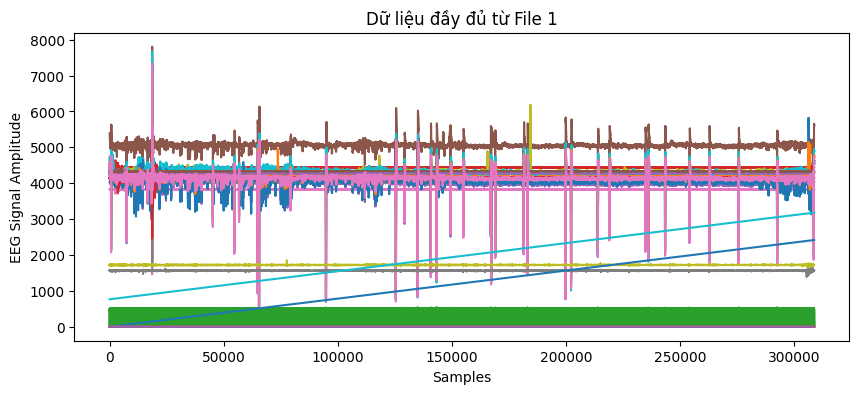


Dữ liệu EEG từ các kênh 4-17: (308868, 14)


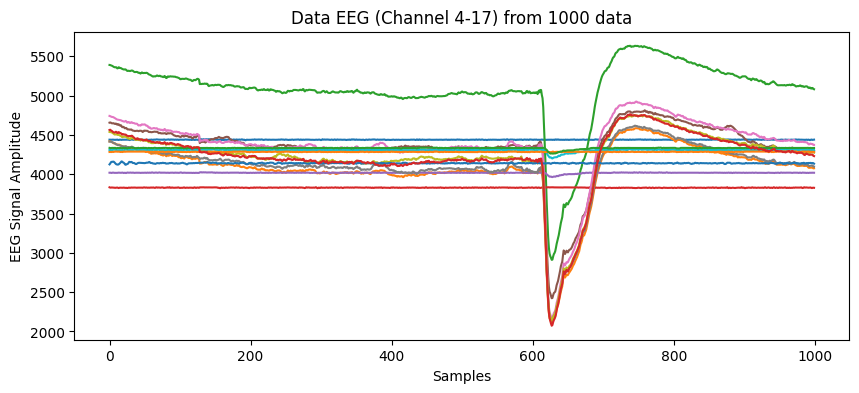

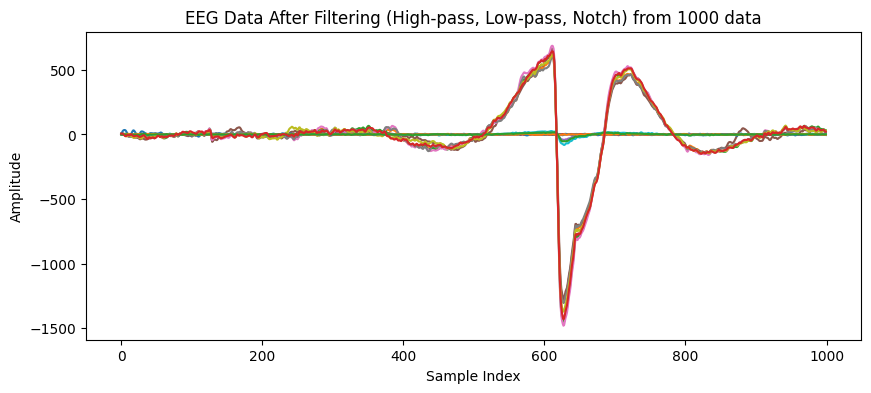

Dữ liệu đầy đủ từ file ../Data\eeg_record2.mat: (366020, 25)


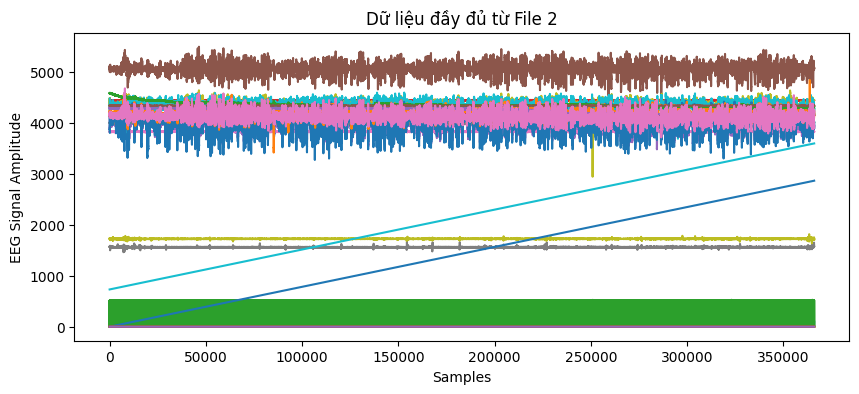


Dữ liệu EEG từ các kênh 4-17: (366020, 14)


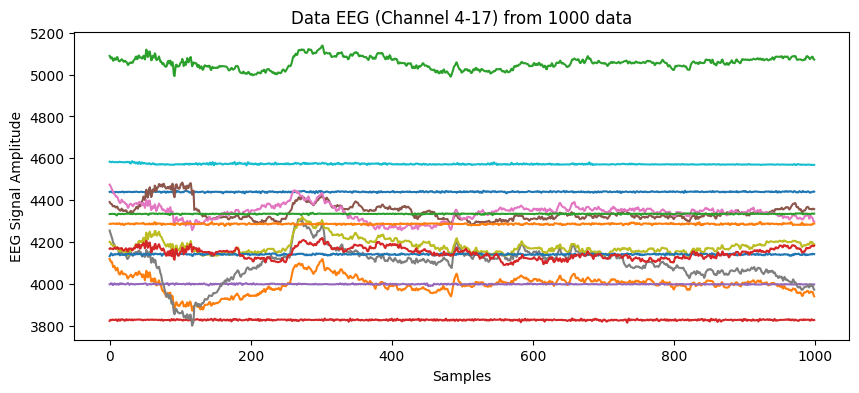

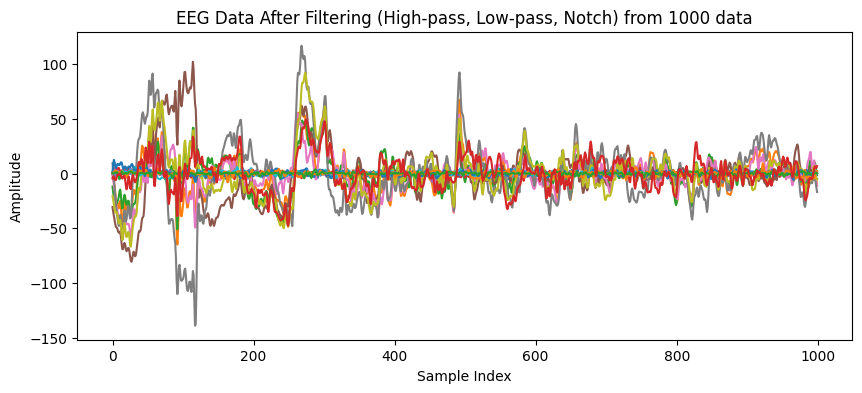

In [83]:
analyze_data(filtered_full_data, file_names)

In [84]:
# Số tổng subject (5)
total_subjects = 5

# Tạo ánh xạ subject_map, với việc lùi chỉ số
subject_map = {}
for s in range(1, total_subjects + 1):
    # Lùi chỉ số 2 ngày đầu, vì cần bỏ qua 2 ngày thử nghiệm
    a = int(7 * (s - 1)) + 3  # Bắt đầu từ ngày thứ 3
    if s != 5:
        b = a + 5  # Người 1-4 có 5 ngày thực tế
    else:
        b = a + 4  # Người 5 có 4 ngày thực tế
    subject_map[s] = [i for i in range(a, b)]

# In ra subject_map để kiểm tra
print(subject_map)

{1: [3, 4, 5, 6, 7], 2: [10, 11, 12, 13, 14], 3: [17, 18, 19, 20, 21], 4: [24, 25, 26, 27, 28], 5: [31, 32, 33, 34]}


* **Subject 1:** Tham gia từ ngày 3 đến ngày 7 (5 ngày thực tế).

* **Subject 2:** Tham gia từ ngày 10 đến ngày 14 (5 ngày thực tế).

* **Subject 3:** Tham gia từ ngày 17 đến ngày 21 (5 ngày thực tế).

* **Subject 4:** Tham gia từ ngày 24 đến ngày 28 (5 ngày thực tế).

* **Subject 5:** Tham gia từ ngày 31 đến ngày 34 (4 ngày thực tế).

Dữ liệu đầy đủ từ file ../Data\eeg_record3.mat: (357224, 25)


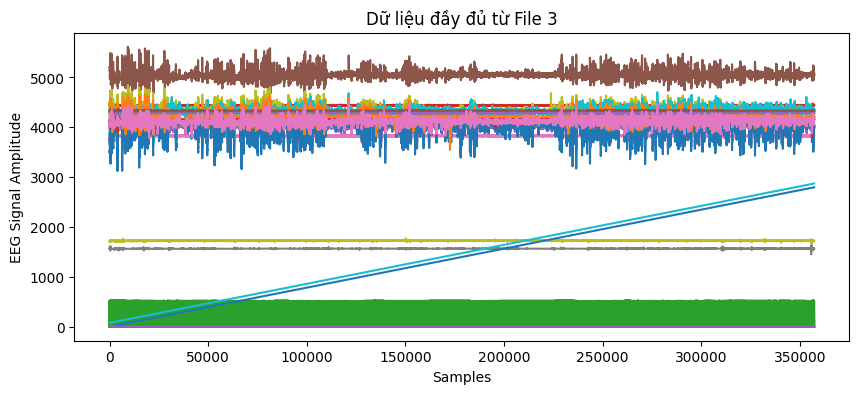


Dữ liệu EEG từ các kênh 4-17: (357224, 14)


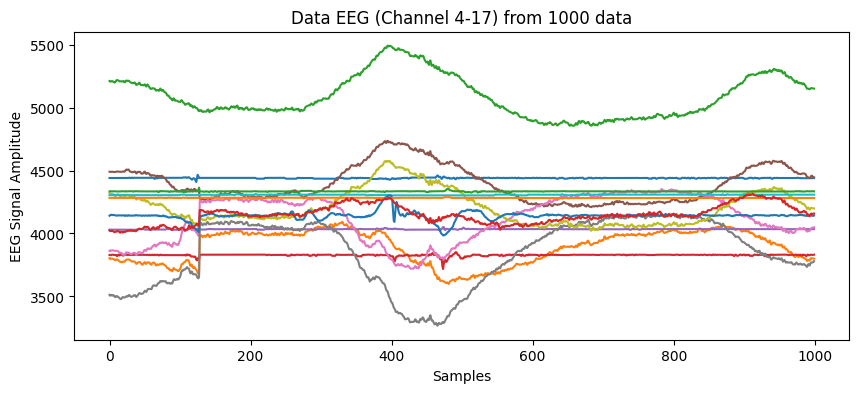

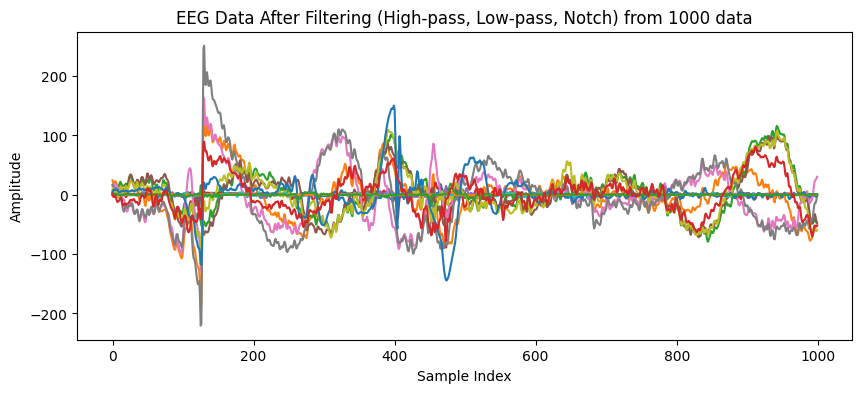

Dữ liệu đầy đủ từ file ../Data\eeg_record4.mat: (380344, 25)


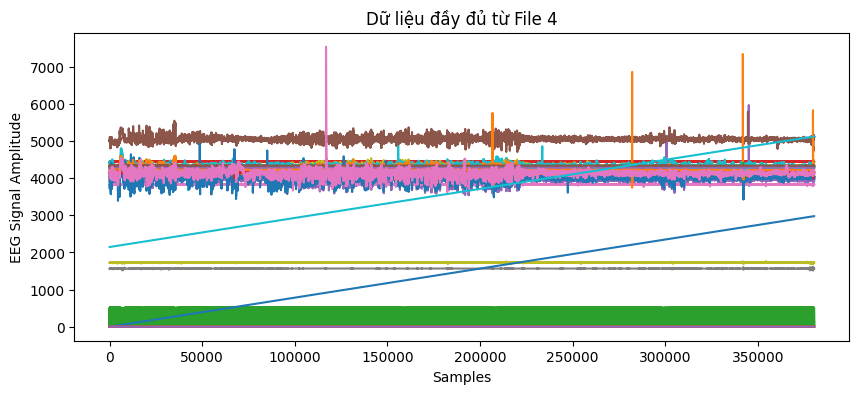


Dữ liệu EEG từ các kênh 4-17: (380344, 14)


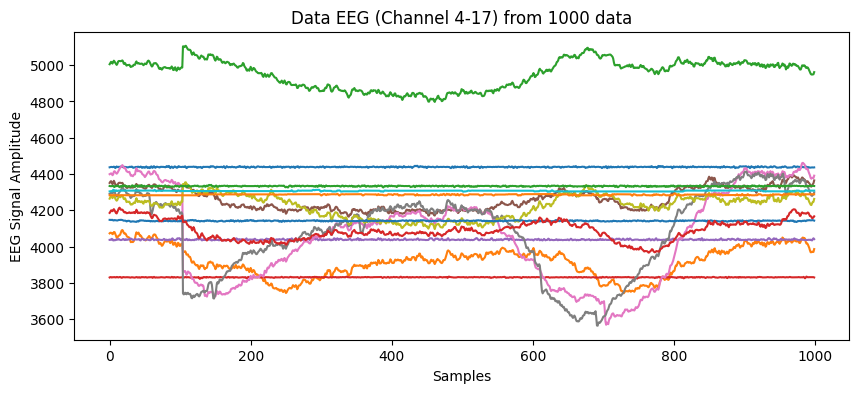

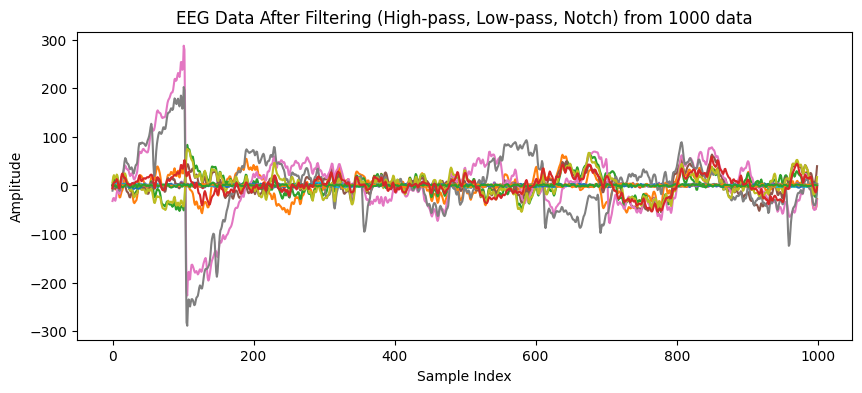

In [85]:
analyze_data(filtered_full_data, file_names, subject_map)

- Dải tần số **Delta** (0.5–4 Hz) liên quan đến giấc ngủ sâu.

- Dải tần số **Theta** (4–8 Hz) liên quan đến sự thư giãn.

- Dải tần số **Alpha** (8–13 Hz) liên quan đến trạng thái thư giãn nhưng tỉnh táo.

- Dải tần số **Beta** (13–30 Hz) liên quan đến sự tập trung, căng thẳng.

Áp dụng các bộ lọc thông dải (`bandpass_filter`) để tách riêng các dải tần số cụ thể (Delta, Theta, Alpha, Beta) và trực quan hoá chúng trên 1000 samples đầu tiên.

In [86]:
def plot_frequency_bands(filtered_data):
    # Định nghĩa các dải tần số
    delta_low, delta_high = 0.5, 4  # Hz
    theta_low, theta_high = 4, 8  # Hz
    alpha_low, alpha_high = 8, 13  # Hz
    beta_low, beta_high = 13, 30  # Hz

    # Lọc thông dải để giữ lại các dải tần số khác nhau
    delta_band = bandpass_filter(filtered_data, delta_low, delta_high, sampFreq)
    theta_band = bandpass_filter(filtered_data, theta_low, theta_high, sampFreq)
    alpha_band = bandpass_filter(filtered_data, alpha_low, alpha_high, sampFreq)
    beta_band = bandpass_filter(filtered_data, beta_low, beta_high, sampFreq)

    

    # Biểu diễn tín hiệu dải delta
    plt.figure(figsize=(15, 6))
    plt.plot(delta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Delta Band (0.5-4 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải theta
    plt.figure(figsize=(15, 6))
    plt.plot(theta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Theta Band (4-8 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải alpha
    plt.figure(figsize=(15, 6))
    plt.plot(alpha_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Alpha Band (8-13 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải beta
    plt.figure(figsize=(15, 6))
    plt.plot(beta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Beta Band (13-30 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()


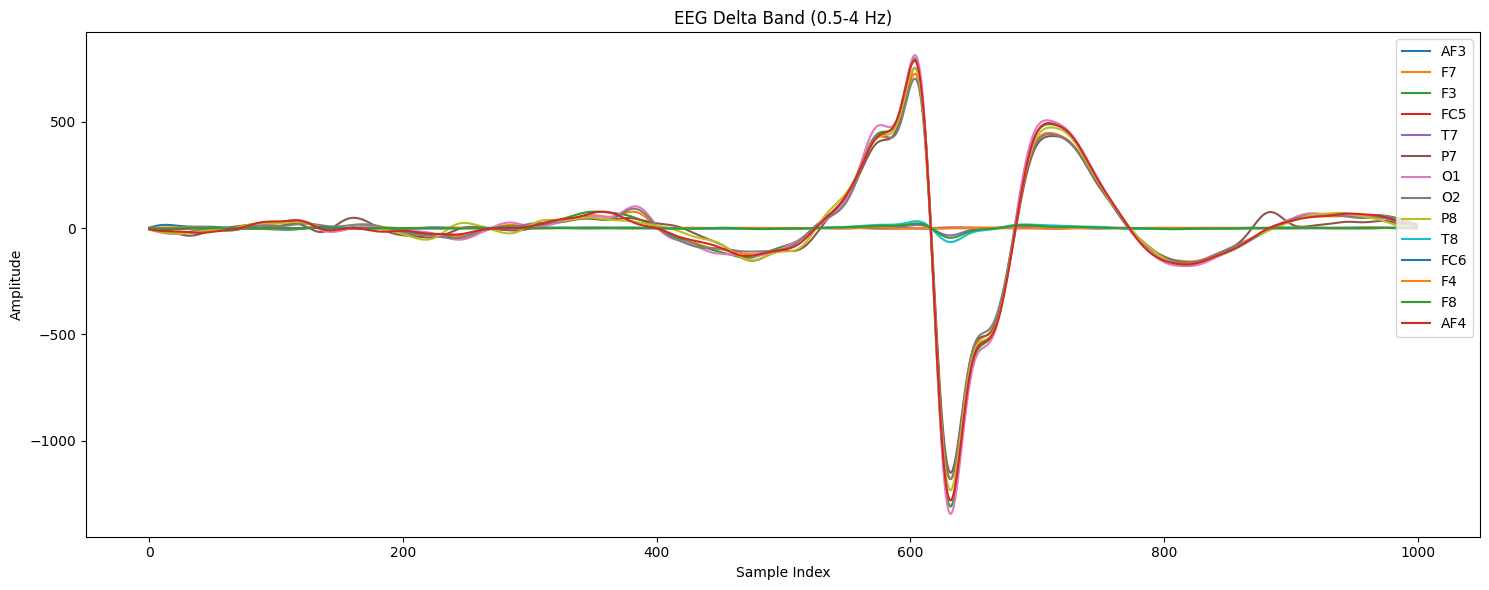

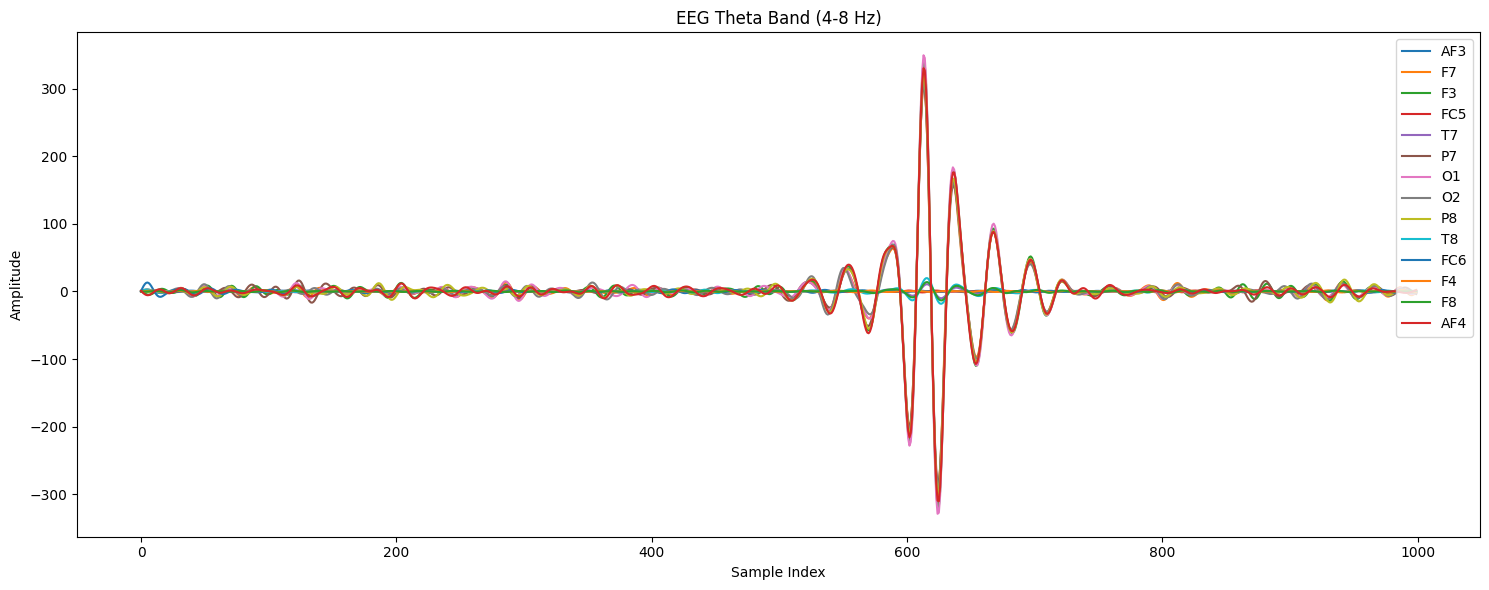

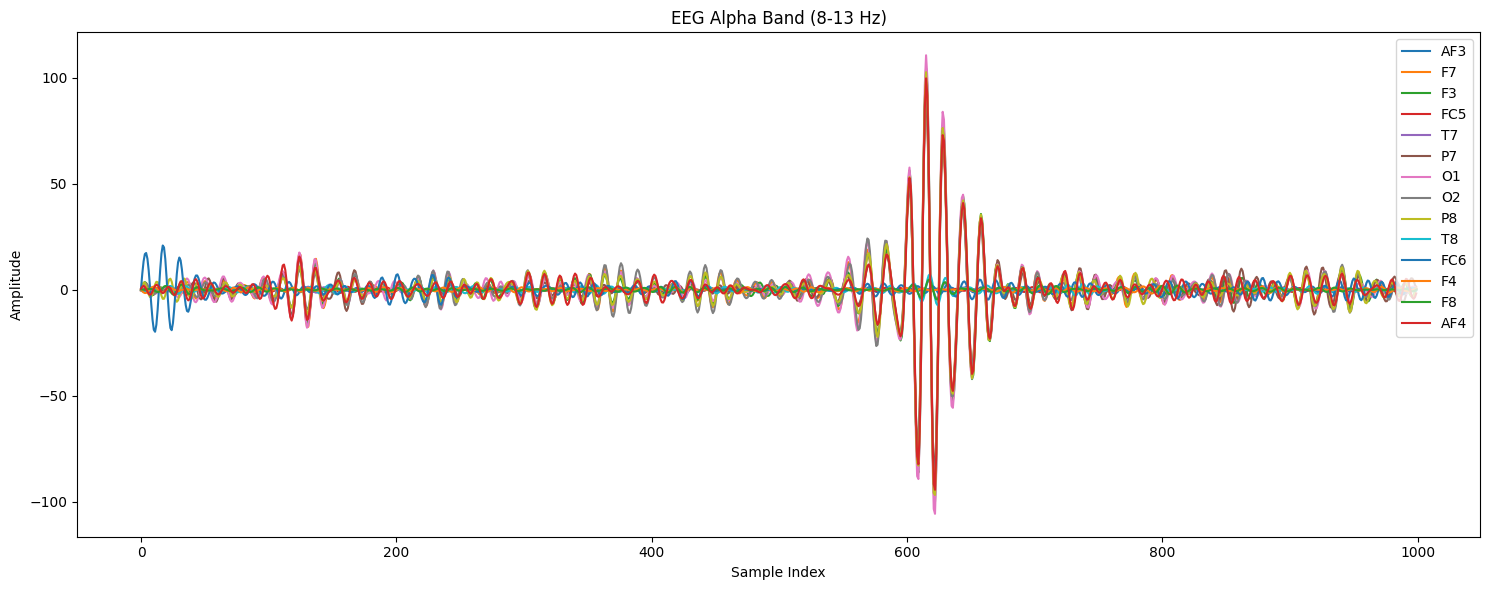

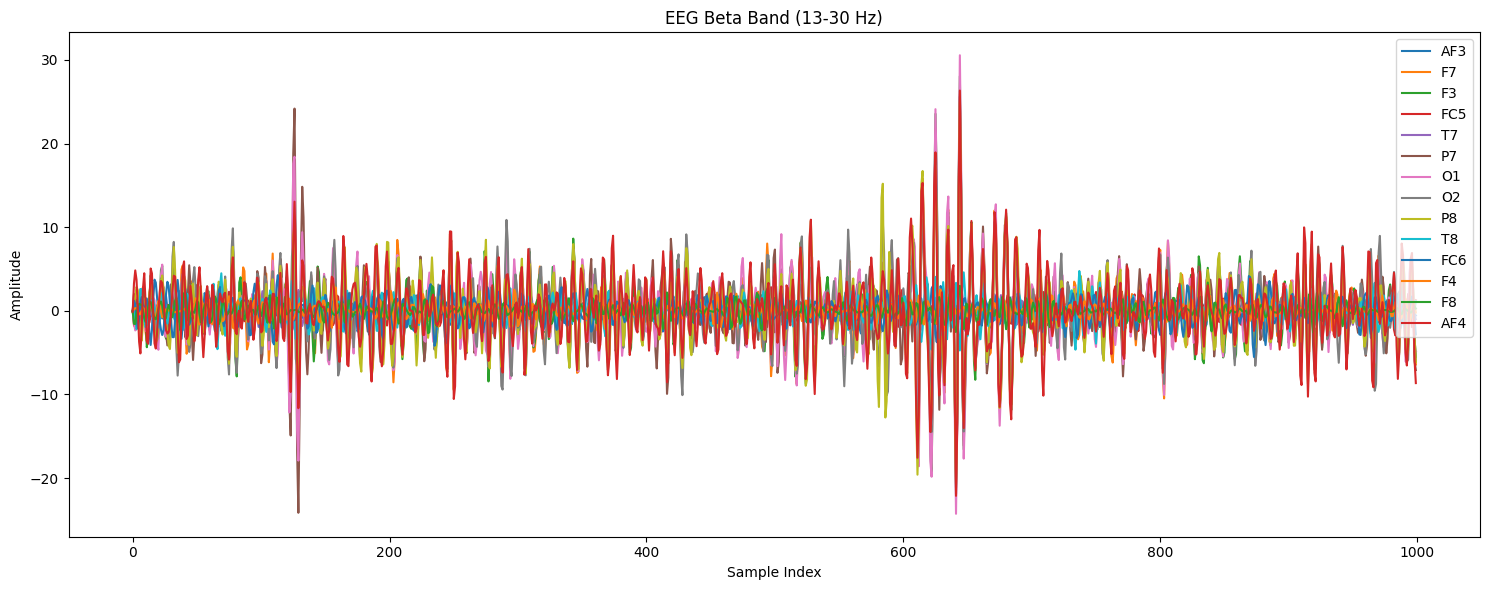

In [87]:
plot_frequency_bands(filtered_full_data[0])

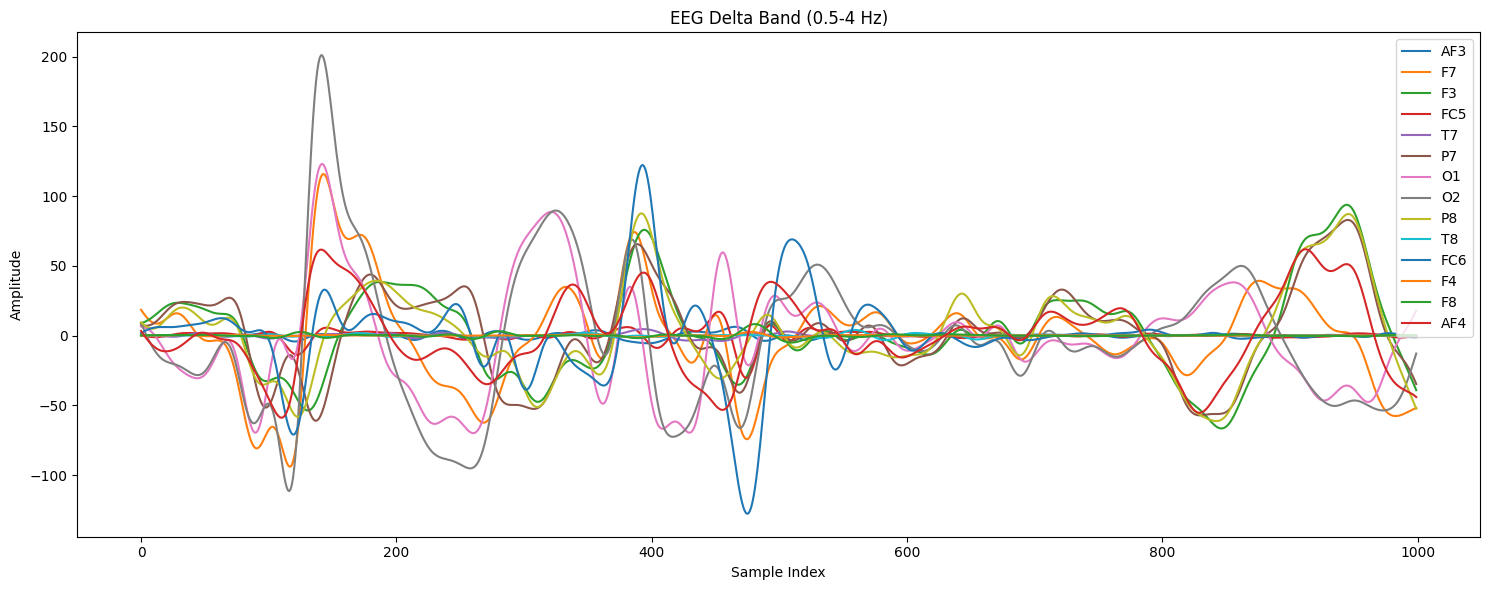

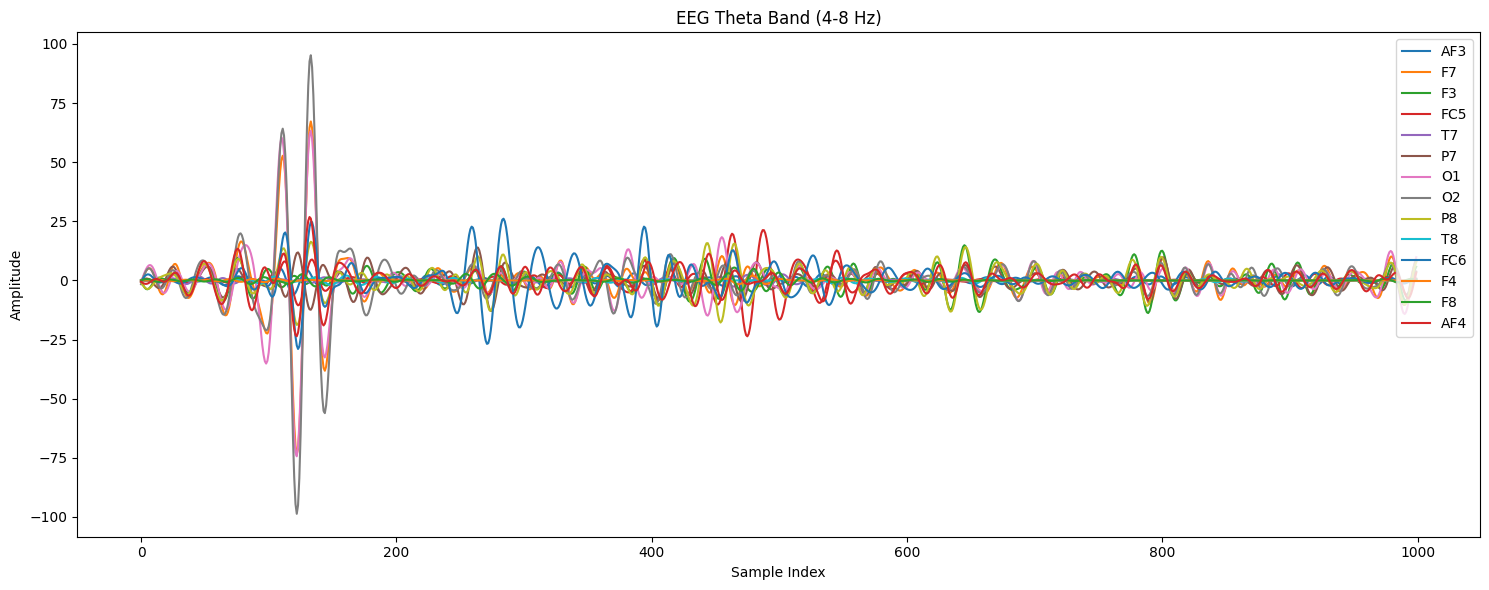

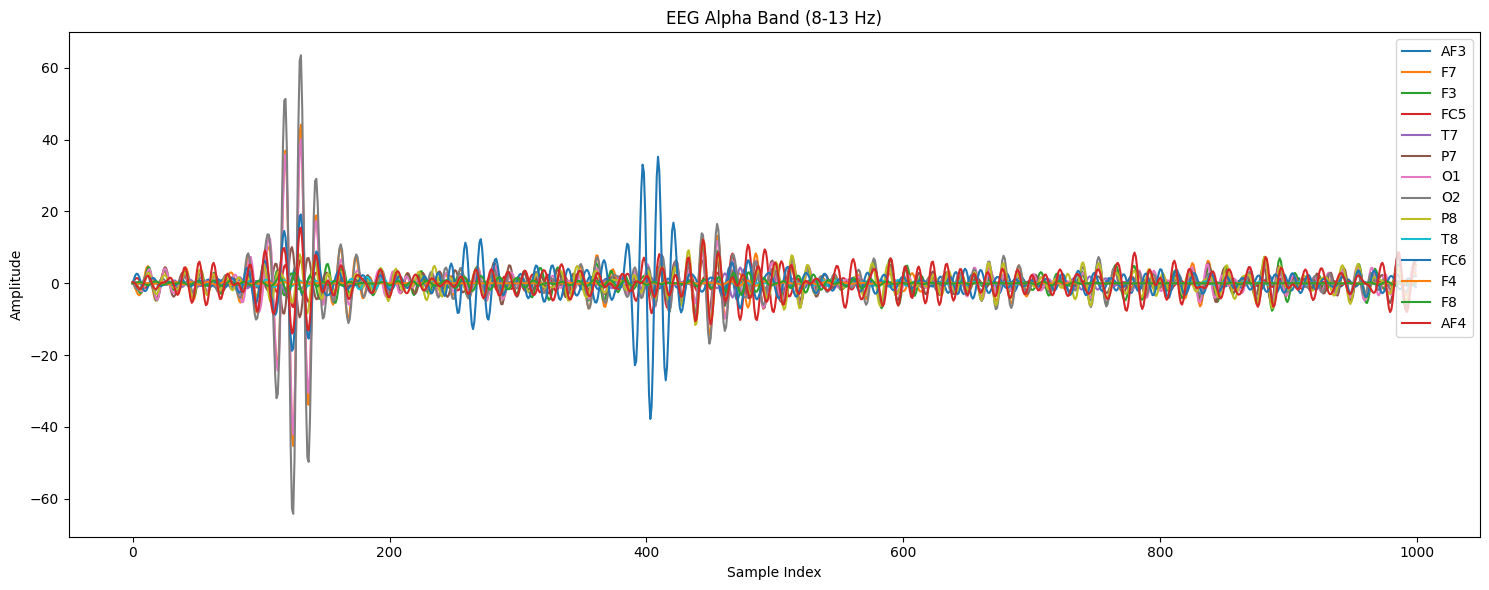

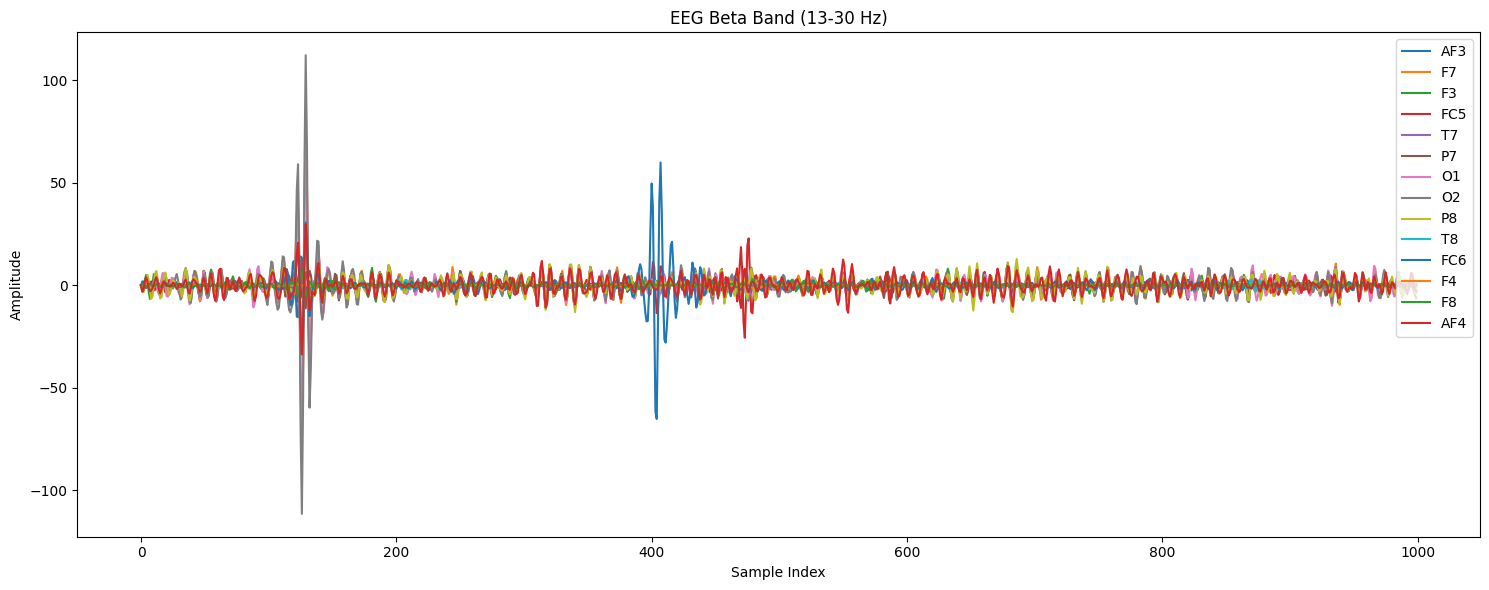

In [88]:
plot_frequency_bands(filtered_reduce_data[0])

### **Independent Component Analysis (ICA)**

ICA là một phương pháp mạnh mẽ để tách các thành phần tín hiệu độc lập từ dữ liệu hỗn hợp. Trong bối cảnh EEG, tín hiệu thu được thường là sự kết hợp của nhiều nguồn tín hiệu, bao gồm cả nhiễu cơ học (chẳng hạn như chuyển động mắt EOG), nhiễu điện tim ECG, và tín hiệu não. ICA giúp phân tách các thành phần này, cho phép loại bỏ các nhiễu không liên quan và chỉ giữ lại các thành phần liên quan đến hoạt động não.

##### **Montage trong EEG là gì?**

- Montage trong EEG là cách các kênh điện cực được sắp xếp trên đầu của một người tham gia nghiên cứu. Nó quyết định vị trí mà các điện cực được đặt trên da đầu, từ đó ảnh hưởng đến cách tín hiệu được ghi lại và phân tích.

##### **Lưới montage 10-20 là gì?**
- Lưới montage 10-20 là một hệ thống sắp xếp tiêu chuẩn được sử dụng để gắn các điện cực lên đầu người tham gia nghiên cứu. Nó được gọi là "10-20" vì khoảng cách giữa các điện cực trong lưới này bằng 10% hoặc 20% của vòng đầu của người tham gia.

    - 10% và 20%: Độ dài của chu vi đầu người được chia thành các đoạn tương ứng 10% và 20%, và các điện cực được đặt tại những vị trí này.
    
    - Hệ thống này có tính nhất quán: Dù người tham gia có kích thước đầu khác nhau, hệ thống này vẫn giúp việc gắn điện cực được thực hiện một cách có hệ thống và dễ dàng tái tạo.

##### **Lý do sử dụng montage 10-20 trong xử lý EEG**

Montage 10-20 là hệ thống chuẩn để gắn các điện cực EEG lên đầu người tham gia nghiên cứu. Việc sử dụng montage này trong xử lý EEG có các lý do quan trọng:

1. **Xác định vị trí chính xác của các kênh**: Gán montage vào đối tượng `Raw` trong MNE giúp xác định chính xác vị trí của các tín hiệu từ các điện cực.

2. **Chuẩn hóa và tái tạo nghiên cứu**: Hệ thống 10-20 cung cấp một chuẩn mực chung, giúp so sánh kết quả nghiên cứu và đảm bảo tính nhất quán trong các phân tích EEG.

3. **Định vị các khu vực chức năng của não**: Montage giúp phân tích tín hiệu theo các vùng chức năng như:
   - **Frontal (trán)**: Nhận thức và hành vi.
   
   - **Central (đỉnh đầu)**: Cảm giác và vận động.
   
   - **Occipital (sau gáy)**: Xử lý thị giác.

Việc gán montage giúp xác định chính xác nguồn gốc tín hiệu và hỗ trợ phân tích dựa trên các vùng chức năng của não.

In [ ]:
import mne
from mne.preprocessing import ICA

# Hàm áp dụng phương pháp ICA vào dữ liệu đã lọc 
def apply_ica_to_data(filtered_data):
    ica_list = []       # Lưu các đối tượng ICA cho mỗi ngày
    raw_list = []       # Lưu các đối tượng Raw đã được tạo từ dữ liệu EEG đã lọc.

    for i in range(len(filtered_data)):
        data_one_day = filtered_data[i]     # Dữ liệu của một ngày

        # Tạo thông tin cho đối tượng Raw
        sfreq = 128  # Tần số lấy mẫu 
        '''
        mne.create_info: hàm tạo thông tin cơ bản về tín hiệu EEG, bao gồm:
            - tên các kênh (channel_names)
            - tần số lấy mẫu (sfreq)
            - loại dữ liệu (ch_types='eeg').
        '''
        info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types='eeg')

        # Lấy dữ liệu đã lọc từ danh sách, chuyển đổi thành dạng phù hợp cho MNE
        filtered_data_mne = data_one_day.T  # Chuyển thành (n_channels, n_times)

        # Tạo đối tượng Raw từ dữ liệu
        raw = mne.io.RawArray(filtered_data_mne, info)

        # Thêm montage vào đối tượng Raw với montage 'standard_1020'
        montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(montage)

        # Áp dụng ICA để tách các thành phần độc lập
        ica = ICA(n_components=14, random_state=42, max_iter='auto')
        ica.fit(raw)

        # Lưu ICA và Raw để sử dụng sau
        ica_list.append(ica)
        raw_list.append(raw)

        # In ra thông báo đã xử lý xong
        print(f'Đã áp dụng ICA cho file thứ {i+1}')

    return ica_list, raw_list

In [90]:
# Áp dụng ICA cho filtered_full_data
ica_full_data, raw_full_data = apply_ica_to_data(filtered_full_data)

# Lọc dữ liệu sau 5 ngày từ ICA và Raw
ica_reduce_data = get_data_5days(ica_full_data)
raw_reduce_data = get_data_5days(raw_full_data)

Creating RawArray with float64 data, n_channels=14, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 9.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 1
Creating RawArray with float64 data, n_channels=14, n_times=366020
    Range : 0 ... 366019 =      0.000 ...  2859.523 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 10.5s.
Đã áp dụng ICA cho dữ liệu của người thứ 2
Creating RawArray with float64 data, n_channels=14, n_times=357224
    Range : 0 ... 357223 =      0.000 ...  2790.805 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 7.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 3
Creating RawArray with float64 data, n_channels=14, n_times=380344
    Range : 0 ... 380343 =      0.000 ...  2971.430 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 16.5s.
Đã áp dụng ICA cho dữ liệu của người thứ 4
Creating RawArray with float64 data, n_channels=14, n_times=351204
    Range : 0 ... 351203 =      0.000 ...  2743.773 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 15.5s.
Đã áp dụng ICA cho dữ liệu của người thứ 5
Creating RawArray with float64 data, n_channels=14, n_times=288752
    Range : 0 ... 288751 =      0.000 ...  2255.867 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 10.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 6
Creating RawArray with float64 data, n_channels=14, n_times=398816
    Range : 0 ... 398815 =      0.000 ...  3115.742 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 7.3s.
Đã áp dụng ICA cho dữ liệu của người thứ 7
Creating RawArray with float64 data, n_channels=14, n_times=365888
    Range : 0 ... 365887 =      0.000 ...  2858.492 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 10.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 8
Creating RawArray with float64 data, n_channels=14, n_times=388788
    Range : 0 ... 388787 =      0.000 ...  3037.398 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 13.1s.
Đã áp dụng ICA cho dữ liệu của người thứ 9
Creating RawArray with float64 data, n_channels=14, n_times=381340
    Range : 0 ... 381339 =      0.000 ...  2979.211 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 10.2s.
Đã áp dụng ICA cho dữ liệu của người thứ 10
Creating RawArray with float64 data, n_channels=14, n_times=391624
    Range : 0 ... 391623 =      0.000 ...  3059.555 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 9.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 11
Creating RawArray with float64 data, n_channels=14, n_times=356728
    Range : 0 ... 356727 =      0.000 ...  2786.930 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 12.6s.
Đã áp dụng ICA cho dữ liệu của người thứ 12
Creating RawArray with float64 data, n_channels=14, n_times=373304
    Range : 0 ... 373303 =      0.000 ...  2916.430 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 12.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 13
Creating RawArray with float64 data, n_channels=14, n_times=345164
    Range : 0 ... 345163 =      0.000 ...  2696.586 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 5.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 14
Creating RawArray with float64 data, n_channels=14, n_times=359164
    Range : 0 ... 359163 =      0.000 ...  2805.961 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 8.4s.
Đã áp dụng ICA cho dữ liệu của người thứ 15
Creating RawArray with float64 data, n_channels=14, n_times=234372
    Range : 0 ... 234371 =      0.000 ...  1831.023 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 6.4s.
Đã áp dụng ICA cho dữ liệu của người thứ 16
Creating RawArray with float64 data, n_channels=14, n_times=443972
    Range : 0 ... 443971 =      0.000 ...  3468.523 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 9.2s.
Đã áp dụng ICA cho dữ liệu của người thứ 17
Creating RawArray with float64 data, n_channels=14, n_times=361840
    Range : 0 ... 361839 =      0.000 ...  2826.867 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 11.5s.
Đã áp dụng ICA cho dữ liệu của người thứ 18
Creating RawArray with float64 data, n_channels=14, n_times=333236
    Range : 0 ... 333235 =      0.000 ...  2603.398 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 6.6s.
Đã áp dụng ICA cho dữ liệu của người thứ 19
Creating RawArray with float64 data, n_channels=14, n_times=396812
    Range : 0 ... 396811 =      0.000 ...  3100.086 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 22.1s.
Đã áp dụng ICA cho dữ liệu của người thứ 20
Creating RawArray with float64 data, n_channels=14, n_times=336280
    Range : 0 ... 336279 =      0.000 ...  2627.180 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 15.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 21
Creating RawArray with float64 data, n_channels=14, n_times=324764
    Range : 0 ... 324763 =      0.000 ...  2537.211 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 17.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 22
Creating RawArray with float64 data, n_channels=14, n_times=388088
    Range : 0 ... 388087 =      0.000 ...  3031.930 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 20.5s.
Đã áp dụng ICA cho dữ liệu của người thứ 23
Creating RawArray with float64 data, n_channels=14, n_times=360928
    Range : 0 ... 360927 =      0.000 ...  2819.742 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 12.6s.
Đã áp dụng ICA cho dữ liệu của người thứ 24
Creating RawArray with float64 data, n_channels=14, n_times=415164
    Range : 0 ... 415163 =      0.000 ...  3243.461 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 36.2s.
Đã áp dụng ICA cho dữ liệu của người thứ 25
Creating RawArray with float64 data, n_channels=14, n_times=363232
    Range : 0 ... 363231 =      0.000 ...  2837.742 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 13.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 26
Creating RawArray with float64 data, n_channels=14, n_times=347548
    Range : 0 ... 347547 =      0.000 ...  2715.211 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 16.7s.
Đã áp dụng ICA cho dữ liệu của người thứ 27
Creating RawArray with float64 data, n_channels=14, n_times=214540
    Range : 0 ... 214539 =      0.000 ...  1676.086 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 8.2s.
Đã áp dụng ICA cho dữ liệu của người thứ 28
Creating RawArray with float64 data, n_channels=14, n_times=424608
    Range : 0 ... 424607 =      0.000 ...  3317.242 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 26.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 29
Creating RawArray with float64 data, n_channels=14, n_times=349008
    Range : 0 ... 349007 =      0.000 ...  2726.617 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 9.7s.
Đã áp dụng ICA cho dữ liệu của người thứ 30
Creating RawArray with float64 data, n_channels=14, n_times=428848
    Range : 0 ... 428847 =      0.000 ...  3350.367 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 10.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 31
Creating RawArray with float64 data, n_channels=14, n_times=483732
    Range : 0 ... 483731 =      0.000 ...  3779.148 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 15.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 32
Creating RawArray with float64 data, n_channels=14, n_times=483376
    Range : 0 ... 483375 =      0.000 ...  3776.367 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 17.4s.
Đã áp dụng ICA cho dữ liệu của người thứ 33
Creating RawArray with float64 data, n_channels=14, n_times=408976
    Range : 0 ... 408975 =      0.000 ...  3195.117 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22732\898059731.py:34: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 12.6s.
Đã áp dụng ICA cho dữ liệu của người thứ 34


Hàm vẽ các thành phần ICA (được tính từ các đối tượng ICA đã áp dụng vào dữ liệu EEG) cho một số lượng file nhất định, và hiển thị tín hiệu của các thành phần này khi áp dụng lên dữ liệu gốc (Raw data).

In [91]:
# def plot_ica_components(ica_list, raw_list, num_files=2, reduce=False):
#     # Nếu giảm dữ liệu, tính toán chỉ số file bắt đầu từ file thứ 3
#     if reduce:
#         start_index = 2  # Người thứ 1 bắt đầu từ file thứ 3
#         step = 7  # Bước nhảy mỗi lần là 7 (người 2 từ file thứ 10, người 3 từ file thứ 17, v.v.)
#     else:
#         start_index = 0  # Nếu không giảm, bắt đầu từ file thứ 1
#         step = 1  # Bước nhảy 1 file mỗi lần

#     for i in range(num_files):
#         # Tính chỉ số file dựa trên người và kiểu dữ liệu
#         file_index = start_index + i * step
#         if file_index < len(ica_list):
#             print(f'Vẽ các thành phần ICA cho file thứ {file_index + 1}')

#             # Vẽ các thành phần ICA
#             ica_list[file_index].plot_components()

#             # Vẽ tín hiệu của các thành phần ICA với Raw data
#             ica_list[file_index].plot_sources(raw_list[file_index], start=0, stop=40, show_scrollbars=False)

#             plt.show()

'''
- ica_list: danh sách các đối tượng ICA đã được tính toán cho mỗi file dữ liệu EEG. Mỗi đối tượng 
            trong danh sách này chứa các thành phần ICA (các nguồn độc lập) được tách ra từ dữ liệu.
- raw_list: danh sách các đối tượng Raw (dữ liệu EEG thô) tương ứng với các file trong ica_list. 
            Mỗi đối tượng Raw chứa dữ liệu EEG đã thu thập từ một người tại một thời điểm cụ thể.
'''
def plot_ica_components(ica_list, raw_list, num_files=2, reduce=False):

    # Định nghĩa số file của mỗi người
    files_per_person_full = [7, 7, 7, 7, 6]  # Số file trong trường hợp full
    files_per_person_reduce = [5, 5, 5, 5, 4]  # Số file trong trường hợp reduce (bỏ 2 file đầu)

    # Chọn danh sách file dựa trên chế độ reduce
    files_per_person = files_per_person_reduce if reduce else files_per_person_full

    # Tính chỉ số file bắt đầu và kết thúc cho mỗi người
    person_start_indices = [sum(files_per_person[:i]) for i in range(len(files_per_person))]

    # Vòng lặp vẽ các file
    file_count = 0  # Số file đã vẽ
    for person_idx, start_index in enumerate(person_start_indices):
        person_files = files_per_person[person_idx]
        for file_idx in range(person_files):
            file_index = start_index + file_idx  # Chỉ số file hiện tại
            if file_count >= num_files:  # Nếu đã đủ số file cần vẽ thì dừng
                return
            if file_index < len(ica_list):  # Đảm bảo file_index hợp lệ
                print(f'Vẽ các thành phần ICA cho file thứ {file_index + 1} (Người {person_idx + 1})')

                # Vẽ các thành phần ICA
                ica_list[file_index].plot_components()

                # Vẽ tín hiệu của các thành phần ICA với Raw data
                ica_list[file_index].plot_sources(raw_list[file_index], start=0, stop=40, show_scrollbars=False)
                plt.show()
                file_count += 1


Vẽ các thành phần ICA cho file thứ 1 (Người 1)


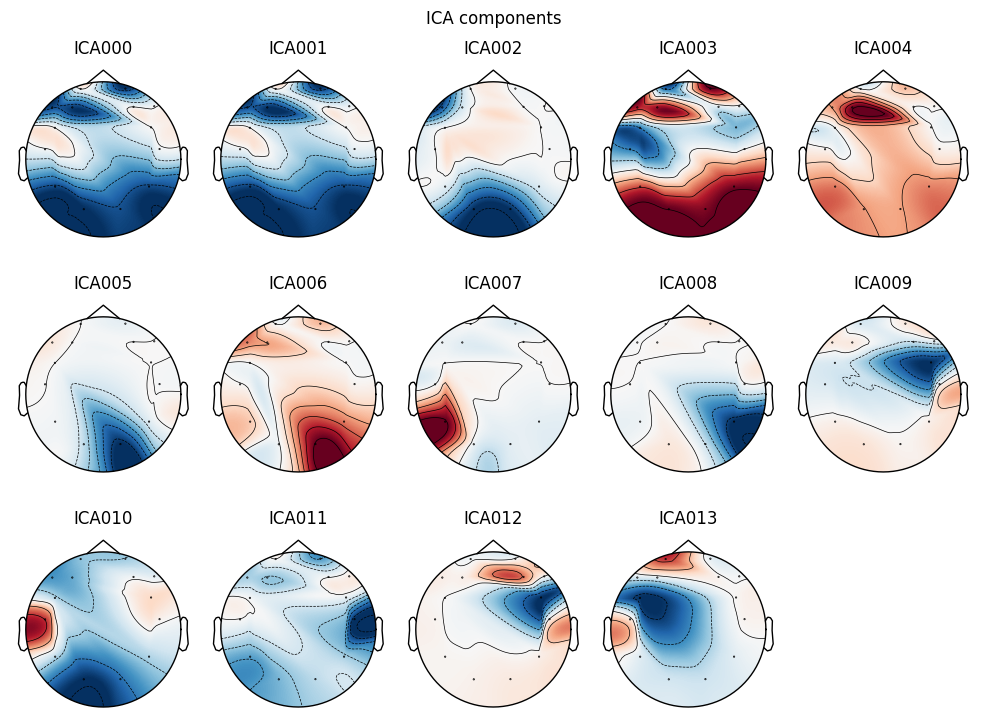

Creating RawArray with float64 data, n_channels=14, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.


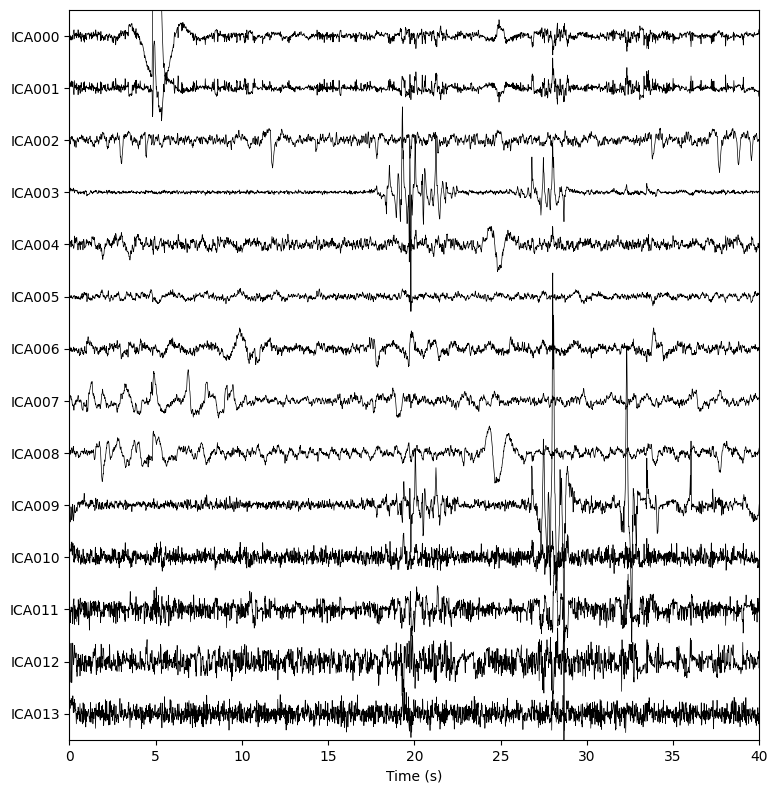

Vẽ các thành phần ICA cho file thứ 2 (Người 1)


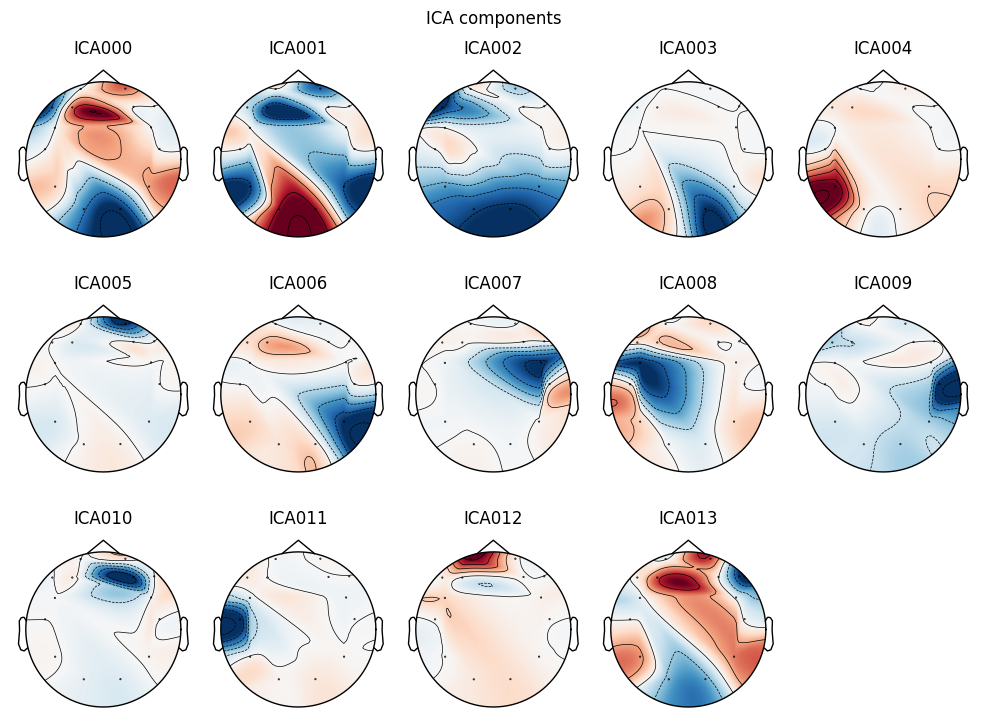

Creating RawArray with float64 data, n_channels=14, n_times=366020
    Range : 0 ... 366019 =      0.000 ...  2859.523 secs
Ready.


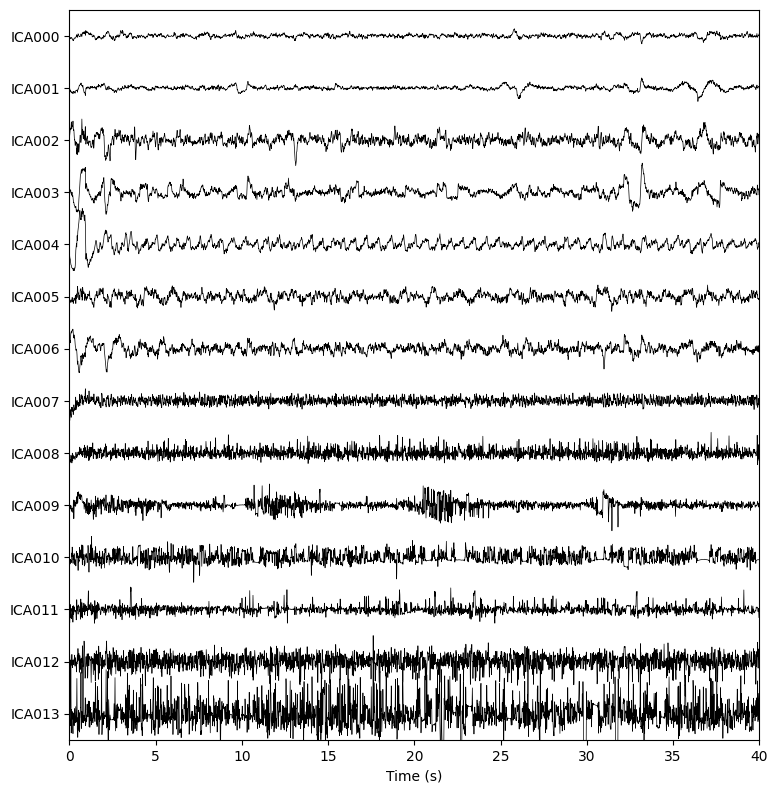

In [92]:
plot_ica_components(ica_full_data, raw_full_data)

Vẽ các thành phần ICA cho file thứ 1 (Người 1)


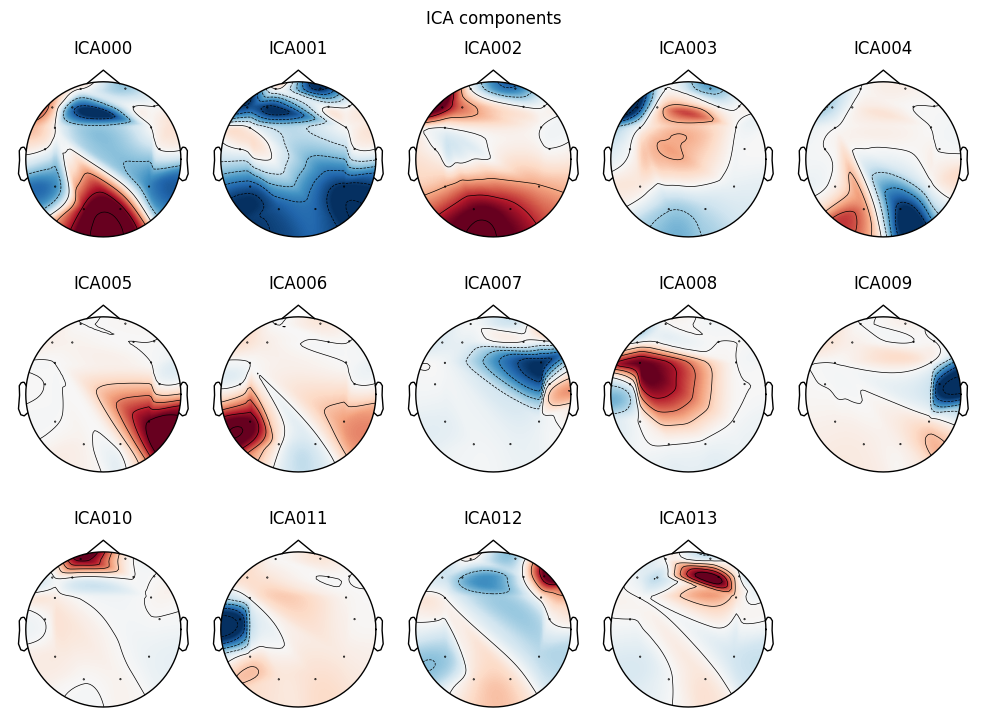

Creating RawArray with float64 data, n_channels=14, n_times=357224
    Range : 0 ... 357223 =      0.000 ...  2790.805 secs
Ready.


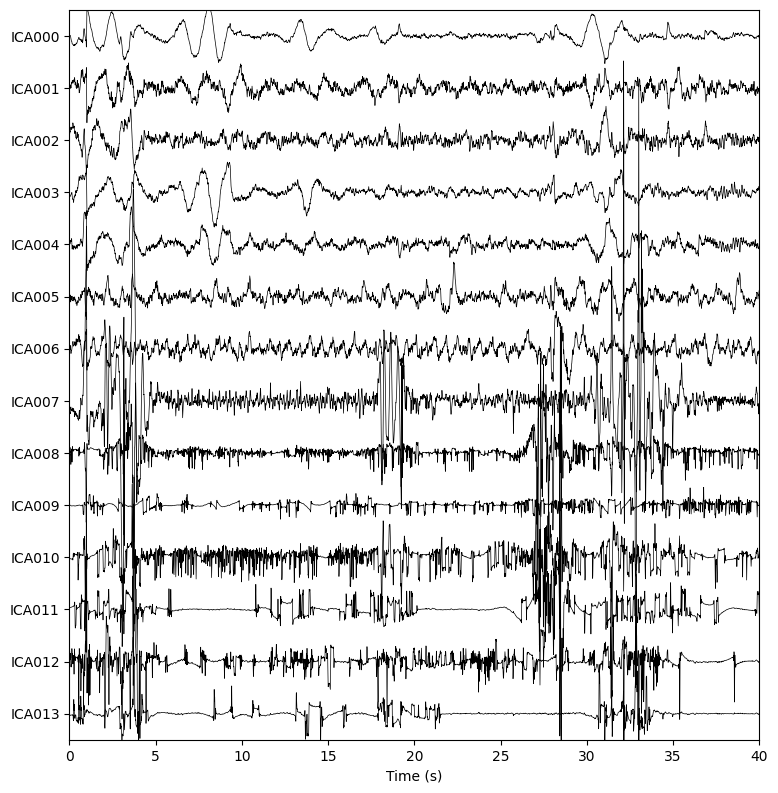

Vẽ các thành phần ICA cho file thứ 2 (Người 1)


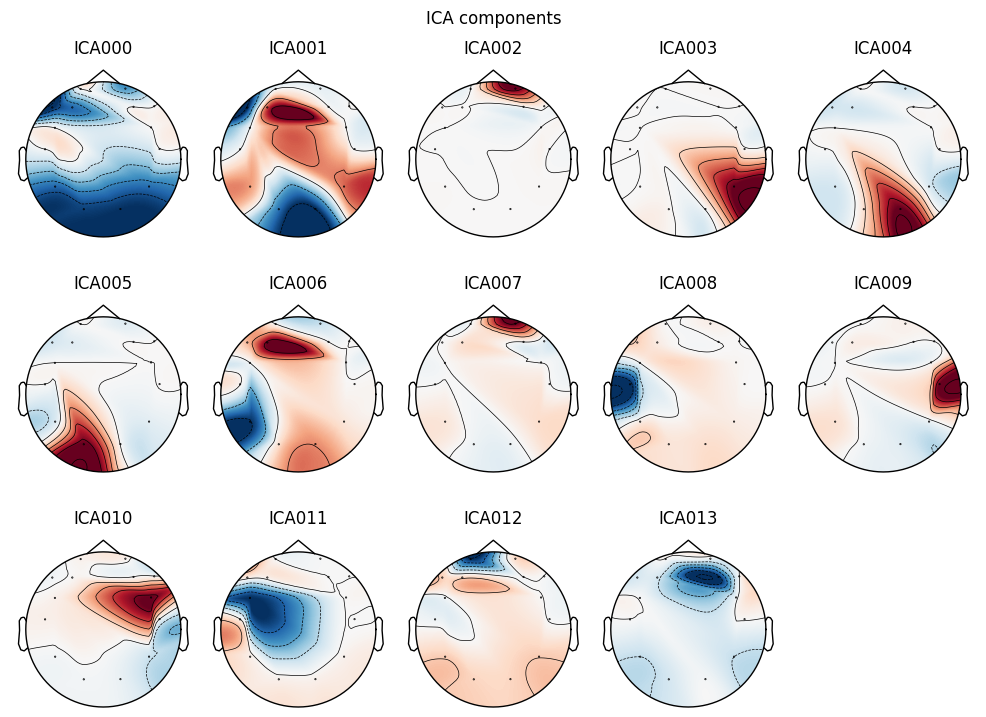

Creating RawArray with float64 data, n_channels=14, n_times=380344
    Range : 0 ... 380343 =      0.000 ...  2971.430 secs
Ready.


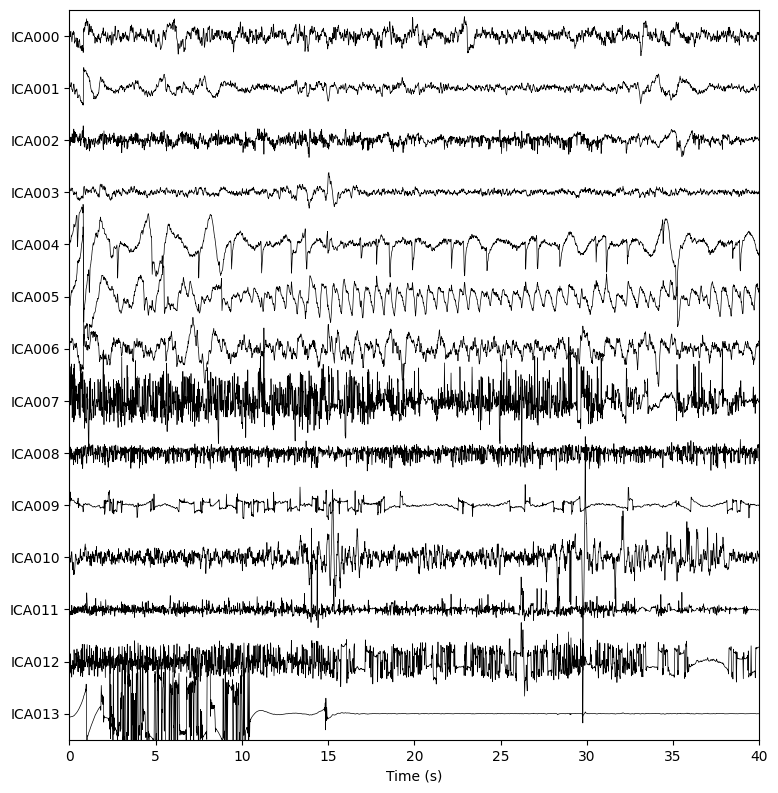

In [93]:
plot_ica_components(ica_reduce_data, raw_reduce_data, num_files=2, reduce=True)

**Phát hiện nhiễu EOG và ECG**

* **EOG artifacts:** Các tín hiệu EOG phát sinh khi mắt chuyển động (ví dụ, nháy mắt hoặc chuyển động mắt theo hướng khác) gây ra dòng điện nhỏ có thể ghi nhận được trên da gần mắt. Các tín hiệu này có thể ảnh hưởng đến tín hiệu EEG, làm cho việc phân tích sóng não trở nên khó khăn hơn.

* **ECG artifacts:** Các nhiễu ECG xuất hiện khi tín hiệu của tim (bao gồm các sóng điện học phát sinh từ hoạt động của tim) xâm nhập vào các kênh EEG. Những nhiễu này có thể làm méo tín hiệu não và cần được phát hiện và loại bỏ.

In [94]:
def detect_eog_artifacts(ica, raw, eye_channels):
    # Lưu trữ các indices của các thành phần ICA mà gây ra nhiễu EOG cho từng eye_channels.
    all_eog_indices = {} 

    for ch in eye_channels:
        if ch in raw.ch_names:  # Kiểm tra nếu kênh có tồn tại trong đối tượng Raw
            try:
                # Phát hiện nhiễu nháy mắt (EOG)
                eog_indices, _ = ica.find_bads_eog(raw, ch_name=ch)
                all_eog_indices[ch] = eog_indices
                # print(f"Các thành phần ICA liên quan đến nháy mắt với kênh {ch}: {eog_indices}")
            except Exception as e:
                print(f"Lỗi khi chạy với kênh {ch}: {e}")

    return all_eog_indices

def detect_ecg_artifacts(ica, raw, heart_related_channels):
    all_ecg_indices = {}

    for ch in heart_related_channels:
        if ch in raw.ch_names:  # Kiểm tra nếu kênh có tồn tại trong đối tượng Raw
            try:
                # Phát hiện nhiễu nhịp tim (ECG)
                ecg_indices, _ = ica.find_bads_ecg(raw, ch_name=ch)
                all_ecg_indices[ch] = ecg_indices
                # print(f"Các thành phần ICA liên quan đến nhịp tim với kênh {ch}: {ecg_indices}")
            except Exception as e:
                print(f"Lỗi khi chạy với kênh {ch}: {e}")

    return all_ecg_indices

def print_indices_results(all_eog_indices, all_ecg_indices):
    # In kết quả EOG
    print("\nKết quả từ tất cả các kênh EOG:")
    for ch, indices in all_eog_indices.items():
        print(f"Kênh {ch}: Thành phần ICA {indices}")

    # In kết quả ECG
    print("\nKết quả từ tất cả các kênh ECG:")
    for ch, indices in all_ecg_indices.items():
        print(f"Kênh {ch}: Thành phần ICA {indices}")

In [95]:
def detect_artifacts(ica_list, raw_list):
    # Danh sách các kênh bị ảnh hưởng nhiễu từ mắt và tim
    eye_channels = ['AF3', 'AF4', 'F7', 'F8', 'F3', 'F4']
    heart_channels = ['FC5', 'FC6']
    # Khởi tạo danh sách lưu trữ các chỉ số thành phần ICA nhiễu EOG và ECG
    eog_indices = []
    ecg_indices = []

    # Duyệt qua từng file trong raw_list và ica_list
    for i in range(len(raw_list)):  # mỗi đối tượng Raw trong raw_list sẽ tương ứng với một đối tượng ICA trong ica_list.
        print(f"\nKết quả cho file #{i + 1}:")
        
        # Phát hiện nhiễu EOG và ECG cho từng file
        eog = detect_eog_artifacts(ica_list[i], raw_list[i], eye_channels)
        ecg = detect_ecg_artifacts(ica_list[i], raw_list[i], heart_channels)

        eog_indices.append(eog)
        ecg_indices.append(ecg)

    return eog_indices, ecg_indices

In [96]:
eog_indices_full, ecg_indices_full = detect_artifacts(ica_full_data, raw_full_data)


Kết quả cho file #1:
Using EOG channel: AF3
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff f

In [97]:
eog_indices_reduce = get_data_5days(eog_indices_full)
ecg_indices_reduce = get_data_5days(ecg_indices_full)

In [98]:
import pandas as pd

def get_artifacts_table(eog_indices, ecg_indices, data_type="EOG"):
    # Khởi tạo danh sách các kênh
    channels = ['AF3', 'AF4', 'F7', 'F8', 'F3', 'F4'] if data_type == "EOG" else ['FC5', 'FC6']

    # Dữ liệu sẽ chứa thông tin từng chỉ số ICA bị nhiễu cho các kênh
    artifact_data = {channel: [] for channel in channels}

    # Duyệt qua từng file để lấy các chỉ số ICA nhiễu
    for artifact in (eog_indices if data_type == "EOG" else ecg_indices):
        for channel in channels:
            # Lấy các thành phần ICA bị nhiễu cho kênh này
            artifact_data[channel].append(artifact.get(channel, []))

    # Chuyển thành DataFrame
    artifact_df = pd.DataFrame(artifact_data)

    # Trả về bảng kết quả
    return artifact_df.transpose()  # Trả về DataFrame với mỗi file là một cột

# In kết quả EOG - Dữ liệu đầy đủ
eog_full_df = get_artifacts_table(eog_indices_full, ecg_indices_full, data_type="EOG")
print("Các chỉ số ICA bị nhiễu mắt (EOG) - Dữ liệu đầy đủ:")
print(eog_full_df)

# In kết quả EOG - Dữ liệu giảm
eog_reduce_df = get_artifacts_table(eog_indices_reduce, ecg_indices_reduce, data_type="EOG")
print("\nCác chỉ số ICA bị nhiễu mắt (EOG) - Dữ liệu giảm:")
print(eog_reduce_df)

# In kết quả ECG - Dữ liệu đầy đủ
ecg_full_df = get_artifacts_table(eog_indices_full, ecg_indices_full, data_type="ECG")
print("\nCác chỉ số ICA bị nhiễu tim (ECG) - Dữ liệu đầy đủ:")
print(ecg_full_df)

# In kết quả ECG - Dữ liệu giảm
ecg_reduce_df = get_artifacts_table(eog_indices_reduce, ecg_indices_reduce, data_type="ECG")
print("\nCác chỉ số ICA bị nhiễu tim (ECG) - Dữ liệu giảm:")
print(ecg_reduce_df)

Các chỉ số ICA bị nhiễu mắt (EOG) - Dữ liệu đầy đủ:
      0     1        2         3        4     5        6         7        8   \
AF3  [3]  [12]  [10, 7]  [12, 10]  [10, 7]    []  [8, 11]  [10, 11]   [7, 6]   
AF4   []    []      [1]    [2, 0]      [3]   [0]   [2, 1]    [3, 5]      [1]   
F7    []    []       []        []      [1]   [6]       []       [4]       []   
F8   [1]  [13]  [12, 7]        []  [13, 7]  [11]  [13, 9]      [12]      [8]   
F3    []    []      [1]       [0]      [5]    []       []        []       []   
F4    []  [10]  [13, 7]      [13]  [12, 7]  [13]     [12]       [9]  [11, 6]   

          9   ...       24       25   26      27       28       29      30  \
AF3      [9]  ...  [9, 12]  [8, 13]   []  [7, 9]   [7, 4]  [9, 12]     [8]   
AF4      [2]  ...   [1, 0]   [4, 2]  [2]  [4, 5]      [2]       []      []   
F7        []  ...       []      [2]   []     [5]       []   [0, 1]  [4, 3]   
F8   [12, 7]  ...      [8]      [7]   []      []  [10, 6]     [13]    [13] 

In [99]:
def exclude_ica_components_for_all(ica_list, raw_list, eog_indices_list, ecg_indices_list):

    excluded_raw_list = []
    
    for idx, ica in enumerate(ica_list):
        print(f"\nĐang loại bỏ thành phần ICA cho file #{idx + 1}:")
        
        # Lấy chỉ số EOG và ECG cho từng file
        eog_indices = eog_indices_list[idx]
        ecg_indices = ecg_indices_list[idx]
        
        # Tạo bản sao của raw để giữ dữ liệu gốc và dữ liệu đã loại trừ riêng biệt
        raw_copy = raw_list[idx].copy()

        # Loại bỏ các thành phần ICA cho EOG và ECG
        all_exclude_indices = []
        
        # Thêm các thành phần ICA bị nhiễu EOG và ECG vào danh sách loại trừ
        for eog in eog_indices.values():  # Duyệt qua các chỉ số EOG
            all_exclude_indices.extend(eog)
        
        for ecg in ecg_indices.values():  # Duyệt qua các chỉ số ECG
            all_exclude_indices.extend(ecg)
        
        # Loại bỏ các thành phần ICA trong ica.exclude
        ica.exclude = list(set(all_exclude_indices))  # Loại bỏ trùng lặp
        print(f"Đã loại bỏ các thành phần ICA: {ica.exclude}")
        
        # Áp dụng ICA sau khi loại trừ
        ica.apply(raw_copy)  # Áp dụng loại trừ vào bản sao của raw

        # Thêm dữ liệu đã loại trừ vào danh sách kết quả
        excluded_raw_list.append(raw_copy)
        
        print(f"Đã loại trừ thành công cho file #{idx + 1}")
    
    return excluded_raw_list

# Sử dụng với dữ liệu đầy đủ (full_data) và dữ liệu giảm (reduce_data)
excluded_raw_full_data = exclude_ica_components_for_all(ica_full_data, raw_full_data, eog_indices_full, ecg_indices_full)
excluded_raw_reduce_data = exclude_ica_components_for_all(ica_reduce_data, raw_reduce_data, eog_indices_reduce, ecg_indices_reduce)


Đang loại bỏ thành phần ICA cho file #1:
Đã loại bỏ các thành phần ICA: [np.int64(1), np.int64(3)]
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Đã loại trừ thành công cho file #1

Đang loại bỏ thành phần ICA cho file #2:
Đã loại bỏ các thành phần ICA: [np.int64(10), np.int64(12), np.int64(13)]
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Đã loại trừ thành công cho file #2

Đang loại bỏ thành phần ICA cho file #3:
Đã loại bỏ các thành phần ICA: [np.int64(1), np.int64(7), np.int64(10), np.int64(12), np.int64(13)]
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 5 ICA components
    Projecting back using 14 PCA components
Đã loại trừ thành công cho file #3

Đang loại bỏ thành phần ICA cho file #4:
Đã loại bỏ các thành phần ICA: [np.int6

In [100]:
# Lưu dữ liệu vào một dictionary với keys là 'file_1', 'file_2', ...
full_data_ICA = {}
reduce_data_ICA = {}

for idx, raw in enumerate(excluded_raw_full_data):
    file_key = f"file_{idx + 1}"  # Key cho từng file (file_1, file_2, ...)
    full_data_ICA[file_key] = raw.get_data()  # Lưu dữ liệu của file vào dictionary

for idx, raw in enumerate(excluded_raw_reduce_data):
    file_key = f"file_{idx + 1}"  # Key cho từng file (file_1, file_2, ...)
    reduce_data_ICA[file_key] = raw.get_data()  # Lưu dữ liệu của file vào dictionary

In [101]:
# In thử data của 1 người (5 file)
full_data_ICA['file_1']

array([[ 3.88631186e-01,  1.97927779e+00,  3.50447792e+00, ...,
        -2.76742229e+00, -1.73737497e+00, -7.29713512e-02],
       [ 2.54681193e+00,  5.78846108e+01,  7.30159615e+01, ...,
         7.32630193e+00,  1.02172418e+01, -5.02942161e-01],
       [-5.51185292e-01,  6.12609134e+01,  7.77386760e+01, ...,
         1.28927218e+00,  4.85324104e+00, -3.76490191e+00],
       ...,
       [ 5.60308676e-01,  9.05149872e-01,  1.29703891e+00, ...,
         1.24127001e+00,  1.30891106e+00, -2.88761416e-02],
       [ 2.40529622e-01,  2.04809179e+00,  3.19064624e+00, ...,
         8.12427282e-02,  8.56321229e-03, -9.41768811e-02],
       [ 2.01338584e+00,  6.21884890e+01,  7.68156540e+01, ...,
         1.32421128e+00,  5.09085610e+00, -1.57261765e+00]])

### **Label**

In [ ]:
def divide_and_label(eeg_data):
    sampFreq = 128
    # Số mẫu trong 10 phút
    samples_per_10_min = sampFreq * 60 * 10
    total_samples = eeg_data.shape[0]

    # Tạo nhãn cho các mẫu
    labels = np.empty(total_samples, dtype=object)
    labels[:samples_per_10_min] = 'focused'  # 10 phút đầu
    labels[samples_per_10_min:samples_per_10_min * 2] = 'unfocused'  # 10 phút tiếp theo
    labels[samples_per_10_min * 2:] = 'drowsy'  # Phần còn lại

    # Tạo DataFrame từ dữ liệu EEG
    channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    df = pd.DataFrame(eeg_data, columns=channel_names)

    # Thêm nhãn vào DataFrame
    df['State'] = labels

    return df

In [ ]:
def process_data(filtered_data_list):
    labeled_data_list = []
    for i, eeg_data in enumerate(filtered_data_list):
        try:
            print(f"Gán nhãn cho tập dữ liệu {i + 1}")

            # Gán nhãn tín hiệu EEG
            labeled_df = divide_and_label(eeg_data)

            # Thêm vào danh sách
            labeled_data_list.append(labeled_df)
        except Exception as e:
            print(f"Lỗi khi xử lý tập {i + 1}: {e}")

    return labeled_data_list

# Gán nhãn riêng cho từng tập dữ liệu
full_labeled_data = process_data(filtered_full_data)
reduce_labeled_data = process_data(filtered_reduce_data)

# Kiểm tra kết quả
print("Số tập dữ liệu đã dán nhãn (full):", len(full_labeled_data))
print("Số tập dữ liệu đã dán nhãn (reduce):", len(reduce_labeled_data))

NameError: name 'sampFreq_full_data' is not defined

### **Combine data**

In [ ]:
def combine_labeled_data(labeled_data_list):
    combined_data = pd.concat(labeled_data_list, ignore_index=True)
    return combined_data

# Kết hợp dữ liệu từ danh sách đã dán nhãn
final_full_data = combine_labeled_data(full_labeled_data)
final_reduce_data = combine_labeled_data(reduce_labeled_data)

# Kiểm tra dữ liệu kết hợp
print("Dữ liệu kết hợp cho full data:")
print(final_full_data.head())
print("Dữ liệu kết hợp cho reduce data:")
print(final_reduce_data.head())

## **Feature Extraction**

In [ ]:
from scipy import stats
# Trung bình
def mean(x):
    return np.mean(x,axis = -1)
# Độ lệch chuẩn
def std(x):
    return np.std(x, axis = -1)
# Peak-to-peak
def ptp(x):
    return np.ptp(x, axis = -1)
# Phương sai
def var(x):
    return np.var(x, axis = -1)
# Giá trị nhỏ nhất
def minim(x):
    return np.min(x,axis=-1)
# Giá trị lớn nhất
def maxim(x):
    return np.max(x,axis=-1)
# Chỉ số giá trị nhỏ nhất
def argminim(x):
    return np.argmin(x,axis=-1)
# Chỉ số giá trị lớn nhất
def argmaxim(x):
    return np.argmax(x,axis=-1)
# RMS
def rms(x):
    return np.sqrt(np.mean(x**2, axis=-1))
# Sự thay đổi tuyệt đối    
def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis = -1)), axis = -1)
# Độ lệch
def skewness(x):
    return stats.skew(x,axis = -1)
# Độ nhọn
def kurtosis(x):
    return stats.kurtosis(x,axis = -1)

In [ ]:
# Hàm trích xuất đặc trưng trong miền thời gian
def time_domain_features(x):
   return np.column_stack((
        mean(x),          
        std(x),
        ptp(x),
        var(x),
        minim(x),
        maxim(x),
        argminim(x),
        argmaxim(x),
        rms(x),
        abs_diff_signal(x),
        skewness(x),
        kurtosis(x)
    ))  # Ghép tất cả các đặc trưng thành một mảng 2D, mỗi đặc trưng là một cột

In [ ]:
from scipy.fft import fft, fftfreq
# Hàm trích xuất đặc trưng trong miền tần số
def frequency_domain_features(x, sfreq):
    # Sử dụng FFT để chuyển tín hiệu từ miền thời gian sang miền tần số
    N = x.shape[-1]
    fft_result = fft(x, axis=-1)
    freqs = fftfreq(N, 1 / sfreq)  # Các tần số tương ứng

    # Lấy giá trị tuyệt đối của FFT (biên độ phổ)
    magnitude = np.abs(fft_result)

    # Tính năng tần số
    dominant_freq = np.argmax(magnitude, axis=-1)  # Tần số đỉnh (dominant frequency)
    total_energy = np.sum(magnitude, axis=-1)  # Tổng năng lượng

    # Tính năng năng lượng trong các dải tần số (alpha, beta, delta, theta)
    delta_energy = np.sum(magnitude[(freqs >= 0.5) & (freqs <= 4)], axis=-1)  # Delta (0.5-4 Hz)
    theta_energy = np.sum(magnitude[(freqs >= 4) & (freqs <= 8)], axis=-1)  # Theta (4-8 Hz)
    alpha_energy = np.sum(magnitude[(freqs >= 8) & (freqs <= 13)], axis=-1)  # Alpha (8-13 Hz)
    beta_energy = np.sum(magnitude[(freqs >= 13) & (freqs <= 30)], axis=-1)  # Beta (13-30 Hz)

    return np.concatenate((dominant_freq, total_energy, delta_energy, theta_energy, alpha_energy, beta_energy), axis=-1)

In [ ]:
from scipy.fft import stft
# Hàm trích xuất các đặc trưng frequency-domain từ STFT
def extract_frequency_features(x, fs=128, nperseg=256):
    # Tính toán STFT cho tín hiệu EEG
    f, t, Zxx = stft(x, fs=fs, nperseg=nperseg)

    # Tính power spectrum (magnitude squared của STFT)
    power_spectrum = np.abs(Zxx) ** 2
    
    # Trích xuất năng lượng theo các dải tần số (Delta, Theta, Alpha, Beta)
    delta_energy = np.sum(power_spectrum[(f >= 0.5) & (f <= 4)], axis=-1)  # Delta (0.5-4 Hz)
    theta_energy = np.sum(power_spectrum[(f >= 4) & (f <= 8)], axis=-1)  # Theta (4-8 Hz)
    alpha_energy = np.sum(power_spectrum[(f >= 8) & (f <= 13)], axis=-1)  # Alpha (8-13 Hz)
    beta_energy = np.sum(power_spectrum[(f >= 13) & (f <= 30)], axis=-1)  # Beta (13-30 Hz)
    
    # Tính các đặc trưng frequency-domain khác
    mean_freq = np.mean(power_spectrum, axis=-1)  # Trung bình power spectrum theo trục tần số
    std_freq = np.std(power_spectrum, axis=-1)    # Độ lệch chuẩn power spectrum
    peak_freq = np.max(power_spectrum, axis=-1)   # Đỉnh lớn nhất trong power spectrum
    total_power = np.sum(power_spectrum, axis=-1) # Tổng công suất trong tất cả các dải tần số

    return np.concatenate((delta_energy, theta_energy, alpha_energy, beta_energy, mean_freq, std_freq, peak_freq, total_power), axis=-1)

In [ ]:
from scipy.fft import fft, ifft
import scipy.signal


# Hàm Fast Fractional Fourier Transform (FRFT)
def frft(f, a):
    ret = np.zeros_like(f, dtype=complex)
    f = f.copy().astype(complex)
    N = len(f)
    shft = np.fmod(np.arange(N) + np.fix(N / 2), N).astype(int)
    sN = np.sqrt(N)
    a = np.remainder(a, 4.0)

    # Special cases
    if a == 0.0:
        return f
    if a == 2.0:
        return np.flipud(f)
    if a == 1.0:
        ret[shft] = fft(f[shft]) / sN
        return ret
    if a == 3.0:
        ret[shft] = ifft(f[shft]) * sN
        return ret

    # reduce to interval 0.5 < a < 1.5
    if a > 2.0:
        a = a - 2.0
        f = np.flipud(f)
    if a > 1.5:
        a = a - 1
        f[shft] = fft(f[shft]) / sN
    if a < 0.5:
        a = a + 1
        f[shft] = ifft(f[shft]) * sN

    # the general case for 0.5 < a < 1.5
    alpha = a * np.pi / 2
    tana2 = np.tan(alpha / 2)
    sina = np.sin(alpha)
    f = np.hstack((np.zeros(N - 1), sincinterp(f), np.zeros(N - 1))).T

    # chirp premultiplication
    chrp = np.exp(-1j * np.pi / N * tana2 / 4 * np.arange(-2 * N + 2, 2 * N - 1).T ** 2)
    f = chrp * f

    # chirp convolution
    c = np.pi / N / sina / 4
    ret = scipy.signal.fftconvolve(np.exp(1j * c * np.arange(-(4 * N - 4), 4 * N - 3).T ** 2), f)
    ret = ret[4 * N - 4:8 * N - 7] * np.sqrt(c / np.pi)

    # chirp post multiplication
    ret = chrp * ret

    # normalizing constant
    ret = np.exp(-1j * (1 - a) * np.pi / 4) * ret[N - 1:-N + 1:2]

    return ret

# Hàm tính toán phép biến đổi ngược FRFT
def ifrft(f, a):
    return frft(f, -a)

# Hàm nội suy sinc
def sincinterp(x):
    N = len(x)
    y = np.zeros(2 * N - 1, dtype=x.dtype)
    y[:2 * N:2] = x
    xint = scipy.signal.fftconvolve(
        y[:2 * N],
        np.sinc(np.arange(-(2 * N - 3), (2 * N - 2)).T / 2),
    )
    return xint[2 * N - 3: -2 * N + 3]

def frft2d(matrix, a = 0.7):
    """
    Calculate the 2D fast fractional fourier transform.
    Parameters
    ----------
    matrix : 2D numpy array
        The signal to be transformed.
    a : list / array
        fractional powers
    Returns
    -------
    data : numpy array
        The transformed 2D signal.
    """
    if isinstance(a, float):  # Kiểm tra nếu a là một giá trị float
        a = [a, a]  # Chuyển đổi thành danh sách với 2 giá trị giống nhau

    temp = np.zeros((matrix.shape[0], matrix.shape[1]), dtype=complex)
    for k in range(0, matrix.shape[0]):
        temp[k, :] = frft(matrix[k, :], a[0])
    out = np.zeros((temp.shape[0], temp.shape[1]), dtype=complex)
    for m in range(0, temp.shape[1]):
        out[:, m] = frft(temp[:, m], a[1])
        
    return out



In [ ]:
from scipy.signal import lfilter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data, axis=0)


In [ ]:
def plot_brainwaves(t, frft_data, fs):
    """
    Vẽ các sóng não Delta, Theta, Alpha, Beta sau khi áp dụng FRFT và lọc băng thông.
    
    Parameters:
    ----------
    t : array
        Mảng thời gian (time vector).
    frft_data : array
        Dữ liệu tín hiệu EEG đã được áp dụng FRFT.
    fs : int
        Tần số mẫu của dữ liệu EEG.
    """
    # Lọc tín hiệu EEG theo các dải tần số
    delta = bandpass_filter(np.real(frft_data), 0.5, 4, fs)  # Delta (0.5 - 4 Hz)
    theta = bandpass_filter(np.real(frft_data), 4, 8, fs)    # Theta (4 - 8 Hz)
    alpha = bandpass_filter(np.real(frft_data), 8, 13, fs)   # Alpha (8 - 13 Hz)
    beta = bandpass_filter(np.real(frft_data), 13, 30, fs)   # Beta (13 - 30 Hz)

    # Vẽ tín hiệu sau khi FRFT và lọc các sóng
    plt.figure(figsize=(12, 10))

    # Tín hiệu Delta
    plt.subplot(4, 1, 1)
    plt.plot(t, delta)
    plt.title('Delta Waves (0.5 - 4 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    # Tín hiệu Theta
    plt.subplot(4, 1, 2)
    plt.plot(t, theta)
    plt.title('Theta Waves (4 - 8 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    # Tín hiệu Alpha
    plt.subplot(4, 1, 3)
    plt.plot(t, alpha)
    plt.title('Alpha Waves (8 - 13 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    # Tín hiệu Beta
    plt.subplot(4, 1, 4)
    plt.plot(t, beta)
    plt.title('Beta Waves (13 - 30 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Ví dụ sử dụng các hàm
Fs = 128  # Tần số mẫu EEG (128 Hz)
T = 1 / Fs  # Khoảng thời gian mẫu
t = np.arange(0, 10, T)  # 10 giây
f0 = 10  # Tần số sóng sin trong dải Alpha (Hz)
eeg_data = np.sin(2 * np.pi * f0 * t)  # Giả lập sóng Alpha

# Áp dụng FRFT lên tín hiệu EEG
a = 0.5  # Giá trị của a cho FRFT
for data in filtered_full_data:
    for i in range(34):
        if i % 7 ==0:
            frft_data = frft(data[i], a)
            # Kiểm tra kích thước của t và frft_data
            print("Kích thước t:", t.shape)
            print("Kích thước frft_data:", frft_data.shape)

            # Gọi hàm để vẽ các sóng não sau khi áp dụng FRFT và lọc
            #plot_brainwaves(t, frft_data, Fs)

In [ ]:
#Spectral Power
def power_spectrum(f, a):
    frft_result = frft(f, a)
    return np.abs(frft_result)**2

#Band Power
def band_power(f, a, band=(4, 8), fs=128):
    # Tính phổ công suất
    psd = power_spectrum(f, a)
    freqs = np.fft.fftfreq(len(f), d=1/fs)  # Tạo mảng tần số từ fs = 128Hz

    # Lọc theo dải tần
    band_mask = (freqs >= band[0]) & (freqs <= band[1])
    band_psd = psd[band_mask]
    band_freqs = freqs[band_mask]

    # Tính tổng công suất trong dải tần
    return np.trapz(band_psd, band_freqs)
# Hàm tính công suất dải tần cho nhiều dải tần
def all_band_powers(f, a, fs=128):
    delta_band = (0.5, 4)
    theta_band = (4, 8)
    alpha_band = (8, 12)
    beta_band = (13, 30)
    
    delta_power = band_power(f, a, band=delta_band, fs=fs)
    theta_power = band_power(f, a, band=theta_band, fs=fs)
    alpha_power = band_power(f, a, band=alpha_band, fs=fs)
    beta_power = band_power(f, a, band=beta_band, fs=fs)
    # Kiểm tra kích thước của các đặc trưng
    print(f"delta_power shape: {delta_power.shape}")
    print(f"theta_power shape: {theta_power.shape}")
    print(f"alpha_power shape: {alpha_power.shape}")
    print(f"beta_power shape: {beta_power.shape}")
    
    return delta_power,theta_power,alpha_power,beta_power

#Median Frequency
def median_frequency(f, a):
    frft_result = frft(f, a)
    psd = np.abs(frft_result)**2
    freqs = np.fft.fftfreq(len(f), d=1/128)  # Tạo mảng tần số từ fs = 128Hz
    
    # Cumulative sum của công suất
    psd_cumsum = np.cumsum(psd)
    psd_cumsum /= psd_cumsum[-1]  # Chuẩn hóa tích phân

    # Tìm tần số tại điểm 50% tích phân
    median_freq = freqs[np.searchsorted(psd_cumsum, 0.5)]
    return median_freq
#Energy
def energy(f, a):
    frft_result = frft(f, a)
    return np.sum(np.abs(frft_result)**2)
#Spectral_entropy
def spectral_entropy(f, a):
    frft_result = frft2d(f, a)
    power_spectrum = np.abs(frft_result)**2
    normalized_ps = power_spectrum / np.sum(power_spectrum)
    return -np.sum(normalized_ps * np.log(normalized_ps))
#Peak Frequency
def peak_frequency(f, a, fs=128):
    frft_result = frft(f, a)
    #Tính PSD
    f_freq, Pxx = scipy.signal.welch(np.abs(frft_result), fs, nperseg=1024)
    peak_idx = np.argmax(Pxx)
    peak_freq = f_freq[peak_idx]
    return peak_freq


In [ ]:
# Hàm trích xuất các đặc trưng trong miền tần số
def frequency_domain_features(f, a, fs=128):
    # Trích xuất các đặc trưng tần số
    delta_power, theta_power, alpha_power, beta_power = all_band_powers(f, a, fs)
    peak_freq_value = peak_frequency(f, a, fs)
    median_freq_value = median_frequency(f, a)
    energy_value = energy(f, a)
    entropy_value = spectral_entropy(f, a)
    
    return np.array([delta_power, theta_power, alpha_power, beta_power,
                     peak_freq_value, median_freq_value, energy_value, entropy_value])

In [ ]:
# Hàm tổng hợp các đặc trưng
def time_frequency_domain_features(f, a):
    # Tính các đặc trưng
    delta_power, theta_power, alpha_power, beta_power = all_band_powers(f, a)
    median_freq = median_frequency(f, a)
    energy_value = energy(f, a)
    entropy = spectral_entropy(f, a)
    peak_freq = peak_frequency(f, a)
    
    features = np.column_stack((
        delta_power,
        theta_power,
        alpha_power,
        beta_power,
        median_freq,
        energy_value,
        entropy,
        peak_freq
    ))  # Ghép các đặc trưng vào dạng 2D với mỗi đặc trưng là một cột
    
    return features
     


In [ ]:
# Hàm trích xuất đặc trưng thời gian + tần số cho một tín hiệu EEG
def extract_features(signal, a=0.7, fs=128):
    # Miền thời gian
    time_features = time_domain_features(signal)

    # Miền tần số
    freq_features = frequency_domain_features(signal, a, fs)

    # Ghép các đặc trưng lại thành một mảng duy nhất
    return np.column_stack((time_features, freq_features))


In [ ]:
# Hàm trích xuất đặc trưng kết hợp
def extract_features(x, frft_angle=0.5):
    # Trích xuất đặc trưng miền thời gian
    time_features = time_domain_features(x)

    # Trích xuất đặc trưng miền tần số
    frft_features_data = time_frequency_domain_features(x, a=frft_angle)

    # if frft_features_data.ndim == 1:
    #     # Nếu frft_features_data là mảng 1D, thêm chiều thứ hai (308868, 1)
    #     frft_features_data = frft_features_data.reshape(-1, 1)

    # Kết hợp các đặc trưng thời gian và tần số
    features = np.concatenate((time_features, frft_features_data), axis=-1)

    return features

In [ ]:
# Hàm chia dữ liệu thành các đoạn 1s (128 samples)
def split_into_segments(data, segment_length = sampFreq):
    segments = []
    num_samples = len(data)
    
    # Chia thành các đoạn con với độ dài là segment_length (1s)
    for start_idx in range(0, num_samples, segment_length):
        end_idx = start_idx + segment_length
        if end_idx <= num_samples:
            segments.append(data[start_idx:end_idx])
    
    return segments


In [ ]:
# Hàm trích xuất đặc trưng từ cả 2 miền thời gian và tần số
def time_frequency_domain_features(data, a=0.5):
    # Chia dữ liệu thành các đoạn 1s
    segments = split_into_segments(data)
    
    # Danh sách lưu trữ các đặc trưng
    features_list = []
    
    # Trích xuất đặc trưng cho từng đoạn
    for segment in segments:
        # Trích xuất đặc trưng miền thời gian
        time_features = time_domain_features(segment)
        
        # Trích xuất đặc trưng miền tần số
        delta_power, theta_power, alpha_power, beta_power = all_band_powers(segment, a)
        spectral_entropy_value = spectral_entropy(segment, a)
        energy_value = energy(segment, a)
        median_freq = median_frequency(segment, a)
        peak_freq = peak_frequency(segment, a)
        
        # Ghép lại tất cả các đặc trưng
        freq_features = np.concatenate([
            delta_power, theta_power, alpha_power, beta_power, 
            spectral_entropy_value.reshape(-1, 1), 
            energy_value.reshape(-1, 1),
            median_freq.reshape(-1, 1),
            peak_freq.reshape(-1, 1)
        ], axis=-1)
        
        # Ghép đặc trưng miền thời gian và miền tần số
        combined_features = np.concatenate([time_features, freq_features], axis=-1)
        
        # Lưu vào danh sách các đặc trưng
        features_list.append(combined_features)
    
    # Chuyển danh sách thành mảng NumPy
    return np.array(features_list)



In [ ]:
# Duyệt qua tất cả các dữ liệu trong filtered_full_data và trích xuất đặc trưng
features_list = []
for data in filtered_full_data:
    features = time_frequency_domain_features(data, a=0.5)  # Trích xuất đặc trưng từ cả 2 miền
    features_list.append(features)

# Chuyển đổi danh sách features_list thành mảng NumPy (features_array)
features_array = np.array(features_list)

# In ra kích thước của mảng features_array
print("Kích thước của features_array:", features_array.shape)

In [ ]:
features_list = []

# Duyệt qua tất cả các dữ liệu trong filtered_full_data
for data in filtered_full_data:
    features = time_frequency_domain_features(data, a = 0.5)  # Trích xuất đặc trưng từ cả 2 miền
    features_list.append(features)

# Chuyển đổi danh sách features_list thành mảng NumPy (features_array)
features_array = np.array(features_list)

# In ra kích thước của mảng features_array
print("Kích thước của features_array:", features_array.shape)


In [ ]:
for i, features in enumerate(filtered_full_data):
    print(f"Features {i} shape: {features.shape}")

In [ ]:
for data in filtered_full_data:
    print(data.shape)  # In ra kích thước của mỗi phần tử data


In [ ]:
for i, features in enumerate(features_list):
    print(f"Features {i} shape: {features.shape}")

In [ ]:
print(filtered_full_data)


In [ ]:
print(features_list)